# EDA espacios Verdes y Comunas

El objetivo principal poder medir y analizar la cantidad y tipo de espacios verdes en la ciudad de buenos aires y a su vez poder compararlos con los que recomiendan organizaciones como la OMS en terminos de M2 (metros cuadrados) de espacios verdes por habitante. Teniendo en cuenta que C.A.B.A. es una de las grandes urbes a nivel mundial.

## Primero se debe instalar geopandas y geoplot

https://stackoverflow.com/questions/54734667/error-installing-geopandas-a-gdal-api-version-must-be-specified-in-anaconda

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to c:\users\tom\appdata\local\temp\pip-req-build-xrxzobr9


  Running command git clone -q git://github.com/geopandas/geopandas.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-xrxzobr9'
  ERROR: Error [WinError 2] El sistema no puede encontrar el archivo especificado while executing command git clone -q git://github.com/geopandas/geopandas.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-xrxzobr9'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?
"apt" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


  Cloning git://github.com/ResidentMario/geoplot.git to c:\users\tom\appdata\local\temp\pip-req-build-c844_s6k


  Running command git clone -q git://github.com/ResidentMario/geoplot.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-c844_s6k'
  ERROR: Error [WinError 2] El sistema no puede encontrar el archivo especificado while executing command git clone -q git://github.com/ResidentMario/geoplot.git 'C:\Users\Tom\AppData\Local\Temp\pip-req-build-c844_s6k'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [37]:
import sys
'geopandas' in sys.modules

True

### Se importan bibliotecas

In [31]:
import geopandas as gpd

In [ ]:
import geoplot as gplt

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [33]:
pd.set_option('display.max_rows', 1000)  
pd.set_option('display.max_columns', 1000) 

# Carga de datasets

Los datasets a utilizar se pueden encontrar en las siguentes paguinas: 

https://data.buenosaires.gob.ar/dataset/espacios-verdes

https://data.buenosaires.gob.ar/dataset/comunas

El de espacios verdes se descarga tanto con pandas para poder manipularlo como con geopandas para las visualizaciones de los mapas. El de comunas solo con geopandas

In [38]:
# Desde jupyter
path_to_datasets = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/'
url_evt = path_to_datasets + 'espacios_verdes.csv'
evt= pd.read_csv(url_evt, error_bad_lines=False)

In [8]:
# desde colab
evt = pd.read_csv("espacios_verdes.csv")

FileNotFoundError: [Errno 2] File espacios_verdes.csv does not exist: 'espacios_verdes.csv'

In [39]:
np.shape(evt)

(1736, 37)

In [40]:
evt.head(3)

WKT  \
0  MULTIPOLYGON (((-58.4453556017045 -34.57924873...   
1  MULTIPOLYGON (((-58.4448145611193 -34.57991038...   
2  MULTIPOLYGON (((-58.4448074253007 -34.57987067...   

                     nombre                               nombre_ev  \
0  Escuela Scalabrini Ortiz  ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ   
1                       NaN                              SIN NOMBRE   
2  Polideportivo Colegiales                POLIDEPORTIVO COLEGIALES   

  clasificac patio_de_j apadrinada  \
0  PLAZOLETA         NO        NaN   
1  PLAZOLETA         NO        NaN   
2     PARQUE         NO        NaN   

                                          observacio fuente_geo fuente_ins  \
0  Redigitalización en Agosto de 2017. Unión de s...       USIG       USIG   
1                                    ESPACIOS VERDES       USIG       USIG   
2  Redigitalización por USIG en Agosto de 2017. U...       USIG       USIG   

                                           ubicacion decreto fecha_decr  \
0  CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...     NaN        NaN   
1  CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...     NaN        NaN   
2  CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...     NaN        NaN   

  ordenanza_ fecha_orde boletin_of fecha_bole      barrio  comuna fech_padri  \
0        NaN        NaN        NaN        NaN  COLEGIALES    13.0        NaN   
1        NaN        NaN        NaN        NaN  COLEGIALES    13.0        NaN   
2        NaN        NaN        NaN        NaN  COLEGIALES    13.0        NaN   

  vig_padri alc_conven               nom_mapa  id_ev_pub      area  perimeter  \
0       NaN        NaN  Esc. Scalabrini Ortiz          2  1658.266        0.0   
1       NaN        NaN                    NaN          5     3.984        0.0   
2       NaN        NaN    Polidep. Colegiales          6  4686.060        0.0   

  DGEV_padri mant_2017 tareas estado  sup_total canil posta_aero etiqueta  \
0        NaN       NaN    NaN    NaN        0.0   NaN        NaN      NaN   
1        NaN       NaN    NaN    NaN        0.0   NaN        NaN      NaN   
2        NaN       NaN    NaN    NaN        0.0   NaN        NaN       NO   

  reja horario_invierno horario_verano obs_reja  
0  NaN              NaN            NaN      NaN  
1  NaN              NaN            NaN      NaN  
2  NaN              NaN            NaN      NaN

In [42]:
evt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WKT               1736 non-null   object 
 1   nombre            937 non-null    object 
 2   nombre_ev         1428 non-null   object 
 3   clasificac        1736 non-null   object 
 4   patio_de_j        1567 non-null   object 
 5   apadrinada        718 non-null    object 
 6   observacio        1150 non-null   object 
 7   fuente_geo        1697 non-null   object 
 8   fuente_ins        1683 non-null   object 
 9   ubicacion         1636 non-null   object 
 10  decreto           493 non-null    object 
 11  fecha_decr        531 non-null    object 
 12  ordenanza_        702 non-null    object 
 13  fecha_orde        738 non-null    object 
 14  boletin_of        768 non-null    object 
 15  fecha_bole        767 non-null    object 
 16  barrio            1730 non-null   object 


In [43]:
num_rows = evt.shape[0]

In [44]:
nulls = evt.isnull().sum()

In [45]:
# Columnas sin nulls
print(nulls[nulls == 0].index.to_list())

['WKT', 'clasificac', 'comuna', 'id_ev_pub', 'area', 'perimeter']


In [47]:
# Columnsas con nulls
print(nulls[nulls != 0].sort_values(ascending=False))

obs_reja            1731
etiqueta            1728
horario_invierno    1723
reja                1723
horario_verano      1723
alc_conven          1669
vig_padri           1668
fech_padri          1667
DGEV_padri          1654
estado              1653
tareas              1653
mant_2017           1653
posta_aero          1567
canil               1542
decreto             1243
fecha_decr          1205
ordenanza_          1034
apadrinada          1018
fecha_orde           998
sup_total            994
fecha_bole           969
boletin_of           968
nom_mapa             801
nombre               799
observacio           586
nombre_ev            308
patio_de_j           169
ubicacion            100
fuente_ins            53
fuente_geo            39
barrio                 6
dtype: int64


Podemos notar que muchas de las columnas tienen una gran cantidad de nulos y no aportan informacion relevante.

Se procede eliminando las columnas con muchos nulos

### Se depuran las columnas con nulos o irrelevantes

In [48]:
evt = evt.drop(["nombre_ev", "apadrinada", "observacio", "fuente_geo",
                "fuente_ins", "decreto", "fecha_decr", "ordenanza_", 
                "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", 
                "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", 
                "mant_2017", "tareas", "estado", "sup_total", "canil", 
                "posta_aero", "etiqueta", "reja", "horario_invierno", 
                "horario_verano", "obs_reja"], axis = 1)

In [49]:
evt.head(3)

WKT  \
0  MULTIPOLYGON (((-58.4453556017045 -34.57924873...   
1  MULTIPOLYGON (((-58.4448145611193 -34.57991038...   
2  MULTIPOLYGON (((-58.4448074253007 -34.57987067...   

                     nombre clasificac patio_de_j  \
0  Escuela Scalabrini Ortiz  PLAZOLETA         NO   
1                       NaN  PLAZOLETA         NO   
2  Polideportivo Colegiales     PARQUE         NO   

                                           ubicacion      barrio  comuna  \
0  CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...  COLEGIALES    13.0   
1  CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...  COLEGIALES    13.0   
2  CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...  COLEGIALES    13.0   

   id_ev_pub      area  perimeter  
0          2  1658.266        0.0  
1          5     3.984        0.0  
2          6  4686.060        0.0

## Uso de geopandas

In [52]:
urlev = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/espacios_verdes.csv'
ev= gpd.read_file(urlev, error_bad_lines=False)
np.shape(ev)

DriverError: '/vsimem/063747d2e10e48eabc7c72d857346587' not recognized as a supported file format.

In [ ]:
# desde colab
ev = gpd.read_file("espacios_verdes.csv")

In [25]:
ev.head(2)

NameError: name 'ev' is not defined

In [ ]:
urlcom = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/comunasg.csv'
ev= gpd.read_csv(urlcom, error_bad_lines=False)
np.shape(com)

In [ ]:
# desde colab
com = gpd.read_file("comunasg.csv")

In [ ]:
com.head(3)

## Limpieza

Cambiamos los nombres de algunas columnas del dataset de comunas por las siguientes razones:
- La columna "comunas" se cambia por "comuna", para que tenga el mismo nombre que en el dataset de espacios verdes.
- La columna  "area" se cambia por "areac" ya que este es el area de la comuna y no se debe confundir con el dataset de espacios verdes ya que en ese caso "area" indica el area de los espacios verdes.

In [26]:
com = com.rename(columns = {'comunas': 'comuna', "area":"areac"}, inplace = False)
com.head(3)

NameError: name 'com' is not defined

In [ ]:
com.info()

En el caso de este datasets son pocas las features y todas utiles

In [ ]:
# Se cambia el formato de la columna comunas a string:
com["comuna"] = com["comuna"].astype("str")
com.head()

# Análisis

Muestro todas las clasificaciones que hay para espacios_verdes

In [9]:
ev["clasificac"].unique()

NameError: name 'ev' is not defined

In [53]:
evtxt= evt.groupby(["clasificac"]).area.sum()
evtxt = evtxt.sort_values(ascending=False)

In [11]:
evtxt

clasificac
PARQUE                       7015027.959
PARQUE SEMIPÚBLICO           3337706.205
PLAZA                        2502148.914
PLAZOLETA                    1824483.321
CANTERO CENTRAL              1112466.599
JARDÍN                        294967.606
BARRIO/COMPLEJO               124739.144
JARDÍN BOTÁNICO                49868.072
PATIO RECREATIVO               14525.283
PATIO                           1515.590
PATIO DE JUEGOS INCLUSIVO       1312.427
PASEO                           1059.347
Name: area, dtype: float64

**Se genera un grafico de barras para conocer cuantos M2 de espacios verde tiene cada clasificación**

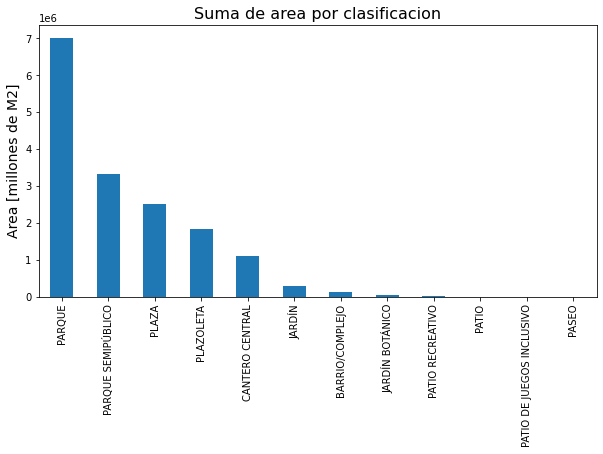

In [17]:
evtxt.plot(kind = "bar", figsize = (10,5));
plt.title("Suma de area por clasificacion", fontsize=16)
plt.ylabel("Area [millones de M2]", fontsize=14);
plt.xlabel("");

In [54]:
evtxc= evt.groupby(["comuna"]).area.sum()
evtxc = evtxc.sort_values(ascending=False)

In [19]:
evtxc

comuna
8.0     4168891.548
1.0     3242112.835
14.0    2220344.164
13.0    1746754.667
10.0    1247864.288
12.0    1014328.639
9.0      717913.744
4.0      614307.522
7.0      342438.339
2.0      336135.186
6.0      215695.441
15.0     209046.017
11.0     118195.611
3.0       45904.233
5.0       20884.801
0.0       19003.432
Name: area, dtype: float64

**Se genera un grafico de barras para conocer cuantos M2 de espacios verde tiene cada comuna**

Text(0.5, 1.0, 'Suma de area por comuna')

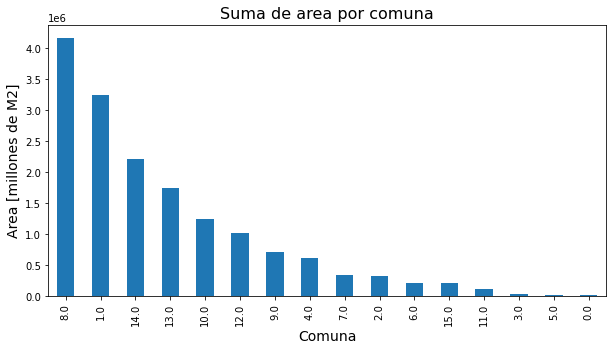

In [20]:
evtxc.plot(kind="bar", figsize = (10,5))
plt.ylabel("Area [millones de M2]", fontsize=14)
plt.xlabel("Comuna", fontsize=14)
plt.title("Suma de area por comuna", fontsize=16)

que hay en la comuna cero?

In [21]:
comuna0 = evt.loc[evt["comuna"] == 0]
comuna0

WKT           nombre  \
1497  MULTIPOLYGON (((-58.5232221247078 -34.62328958...              NaN   
1570  MULTIPOLYGON (((-58.4663008073522 -34.68746336...              NaN   
1571  MULTIPOLYGON (((-58.4669406654543 -34.68696838...              NaN   
1573  MULTIPOLYGON (((-58.4700730928219 -34.68389105...              NaN   
1574  MULTIPOLYGON (((-58.4712783786892 -34.68495759...              NaN   
1727  MULTIPOLYGON (((-58.3679544979871 -34.60904171...  Parque del Bajo   

     clasificac patio_de_j                                          ubicacion  \
1497  PLAZOLETA         NO                                  NOGOYA - IRIGOYEN   
1570  PLAZOLETA         NO  BERGANTIN NANCY ENTRE GOLETA MALDONADO y SUMAC...   
1571  PLAZOLETA         NO  BERGANTIN NANCY ENTRE GOLETA MALDONADO y SUMAC...   
1573  PLAZOLETA         NO  CAFAYATE AV - BERGANTIN GENERAL BELGRANO - CAÑ...   
1574  PLAZOLETA         NO  LISANDRO DE LA TORRE AV - FRAGATA 25 DE MAYO -...   
1727     PARQUE         NO  MADERO EDUARDO AV - PERON JUAN DOMINGO TTE - R...   

     barrio  comuna  id_ev_pub       area  perimeter  
1497    NaN     0.0       1643    218.798     68.768  
1570    NaN     0.0       1718    567.443    143.722  
1571    NaN     0.0       1717    636.672    155.392  
1573    NaN     0.0       1720   4691.384   1394.215  
1574    NaN     0.0       1721   1067.996    431.405  
1727    NaN     0.0       1875  11821.139      0.000

**Se modifican los valores de la comuna por los que realmente son:**

In [55]:
evt.loc[1497, 'comuna'] = 10.0
evt.loc[1570, 'comuna'] = 8.0
evt.loc[1571, 'comuna'] = 8.0
evt.loc[1573, 'comuna'] = 8.0
evt.loc[1574, 'comuna'] = 8.0
evt.loc[1727, 'comuna'] = 1.0

In [105]:
# Chequeo de que no quedan comunas 0:
comuna0 = evt["comuna"] == 0
comuna0 = evt[comuna0]
comuna0

Empty DataFrame
Columns: [WKT, nombre, clasificac, patio_de_j, ubicacion, barrio, comuna, id_ev_pub, area, perimeter]
Index: []

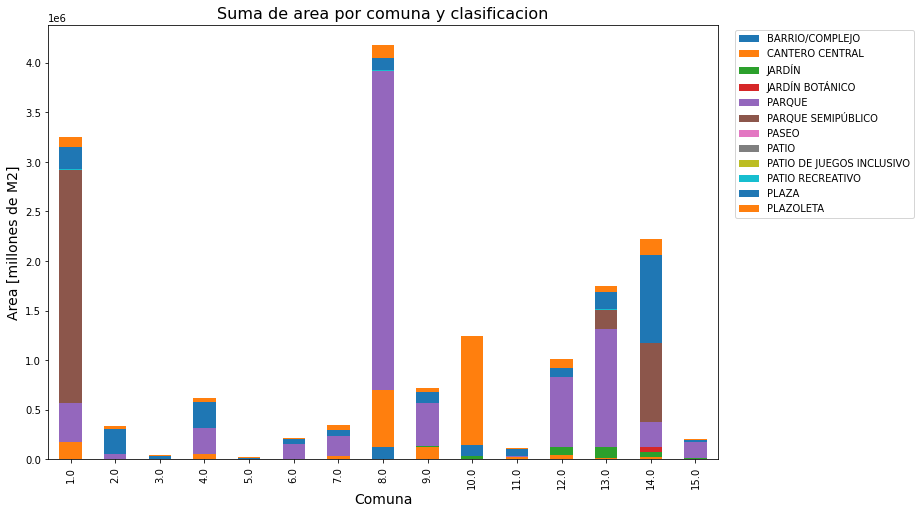

In [24]:
sub_evt = evt.groupby(["comuna", "clasificac"])["area"].sum().unstack()
sub_evt.plot(kind="bar", stacked=True, label=True, figsize = (12,8));
plt.ylabel("Area [millones de M2]", fontsize=14);
plt.xlabel("Comuna", fontsize=14);
plt.title("Suma de area por comuna y clasificacion", fontsize=16);
plt.legend(bbox_to_anchor=(1.3, 1));

### Se generan Boxplot por cada clasificacion de Espacios verdes y por comuna

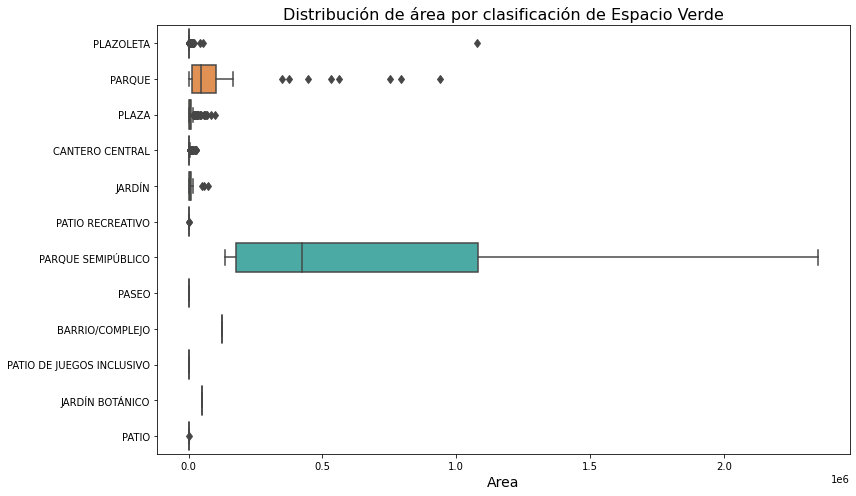

In [25]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(y="clasificac", x="area", data=evt, fliersize = 6)
plt.title("Distribución de área por clasificación de Espacio Verde", fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('')
plt.tight_layout()

**Se realiza el mismo grafico exceptuando el parque semipublico ya que tiene parametros muy lejanos a la media (una especie de outlier) y eso dificulta la visualizacion de las demas clasificaciones**

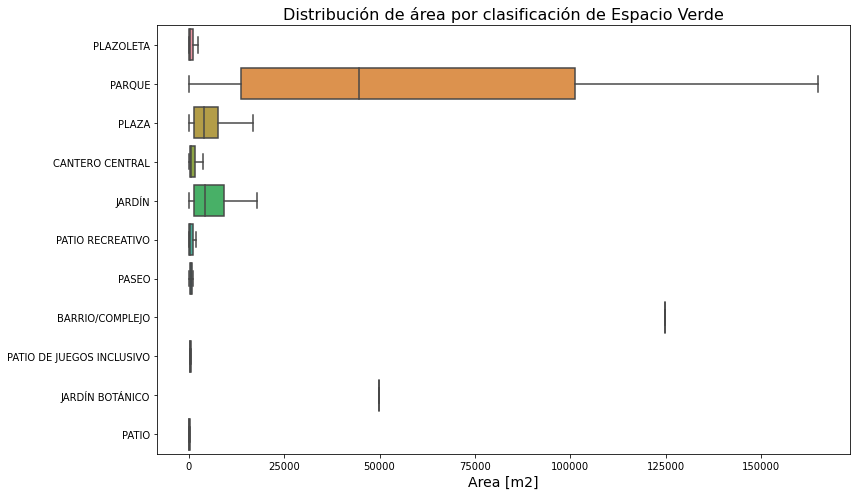

In [26]:
evtsps = evt[evt['clasificac'] != "PARQUE SEMIPÚBLICO"]

plt.figure(figsize=(12,7))
ax = sns.boxplot(y="clasificac", x="area", data=evtsps, fliersize = 6, showfliers=False)
plt.title("Distribución de área por clasificación de Espacio Verde", fontsize=16)
plt.xlabel('Area [m2]', fontsize=14)
plt.ylabel('')
plt.tight_layout()

**Se puede notar facilmente que ademas de "parque semipubluco" las clasificaciones de mayor cantidad de metros cuadrados son los parques, jardines y plazas.**

#### Tambien mostramos un Pairplot clasificado por tipo de Espacio Verde para entender mejor las relaciones de las variables

In [62]:
evt.dtypes

WKT             object
nombre          object
clasificac      object
patio_de_j      object
ubicacion       object
barrio          object
comuna        category
id_ev_pub        int64
area           float64
perimeter      float64
dtype: object

In [61]:
evt['comuna'] = evt['comuna'].astype('int')
evt['comuna'] = evt['comuna'].astype('category')

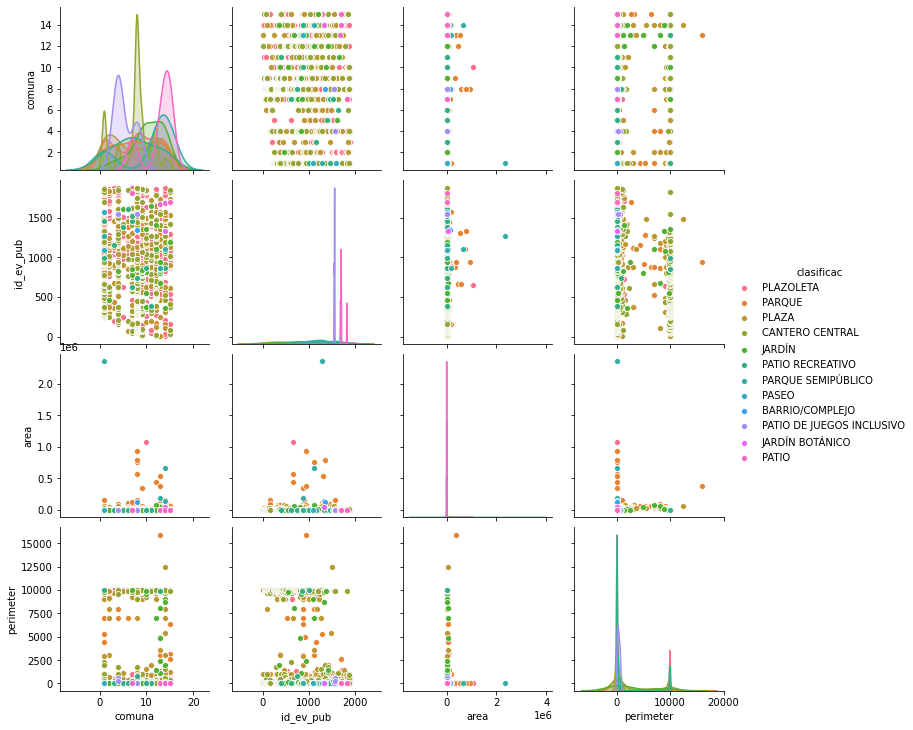

In [63]:
sns.pairplot(evt, hue = "clasificac")

plt.show()

Se hacen tablas y gráficos de torta para entender la cantidad de cada espacio y la distribucion de los m2 por clasificacion

In [67]:
evxcl = evt.clasificac.value_counts()
evxcl

PLAZOLETA                    644
CANTERO CENTRAL              643
PLAZA                        333
PARQUE                        56
JARDÍN                        27
PATIO RECREATIVO              17
PATIO                          5
PARQUE SEMIPÚBLICO             4
PATIO DE JUEGOS INCLUSIVO      3
PASEO                          2
BARRIO/COMPLEJO                1
JARDÍN BOTÁNICO                1
Name: clasificac, dtype: int64

In [84]:
# Función para gráficos pie
def pie_chart(data, categorias, title):
    
    data = data.to_list()
    categorias = categorias.to_list()
    
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(categorias[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title, fontsize=16, pad=20)

    percents = [str(round((x/np.array(data).sum())*100, 1))+"%   " + y for x, y in zip(data, categorias)]
    plt.legend(wedges, percents, loc='right center', bbox_to_anchor=(1.8, 1.),
               fontsize=14)
    plt.tight_layout()
    plt.show()

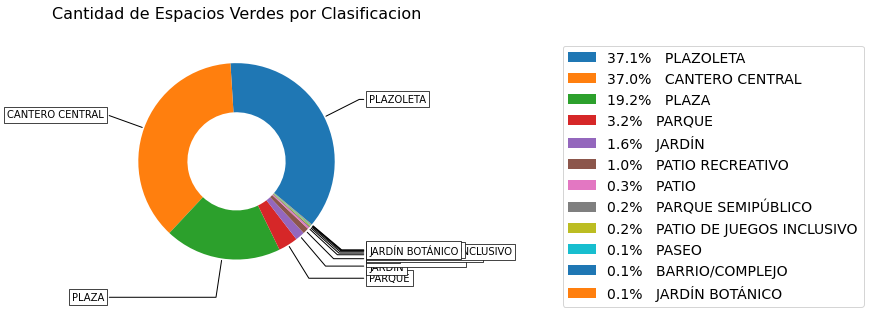

In [85]:
pie_chart(data=evxcl, categorias=evxcl.index, title='Cantidad de Espacios Verdes por Clasificacion')

**Tambien se analiza la cantidad distribucion de los metros cuadrados por clasificacion**

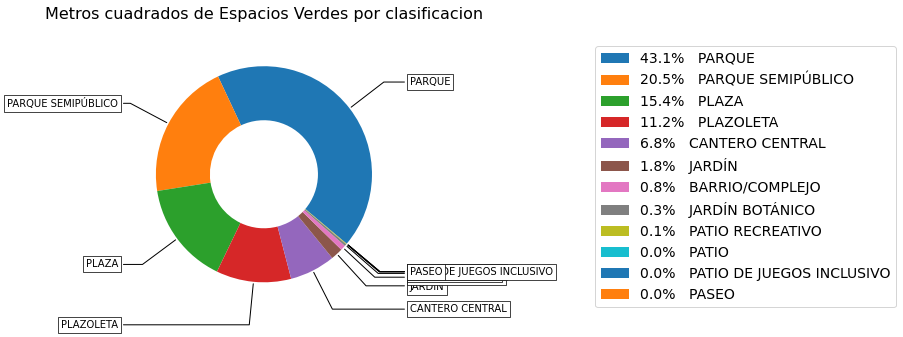

In [82]:
pie_chart(data=evtxt, categorias=evtxt.index, title='Metros cuadrados de Espacios Verdes por clasificacion')

**Antes veíamos que plazoletas y canteros abundan, pero tienen muy poca área. Por lo tanto en este gráfico vemos que la mayoría de total del área de espacios verdes se lo llevan los parques y plazas.**

Tanto la tabla como el grafico de tortas se realizan a nivel comuna

In [74]:
mevxc = evt.groupby(["comuna"]).area.sum()
mevxc = mevxc.reset_index()
mevxc['comuna'] = mevxc['comuna'].apply(lambda x: int(x))
mevxc['comuna'] = mevxc['comuna'].astype('str')
mevxc['comuna'] = mevxc['comuna'].apply(lambda x: 'comuna '+x)

In [575]:
mevxc

comuna         area
0    comuna 1  3253933.974
1    comuna 2   336135.186
2    comuna 3    45904.233
3    comuna 4   614307.522
4    comuna 5    20884.801
5    comuna 6   215695.441
6    comuna 7   342438.339
7    comuna 8  4175855.043
8    comuna 9   717913.744
9   comuna 10  1248083.086
10  comuna 11   118195.611
11  comuna 12  1014328.639
12  comuna 13  1746754.667
13  comuna 14  2220344.164
14  comuna 15   209046.017

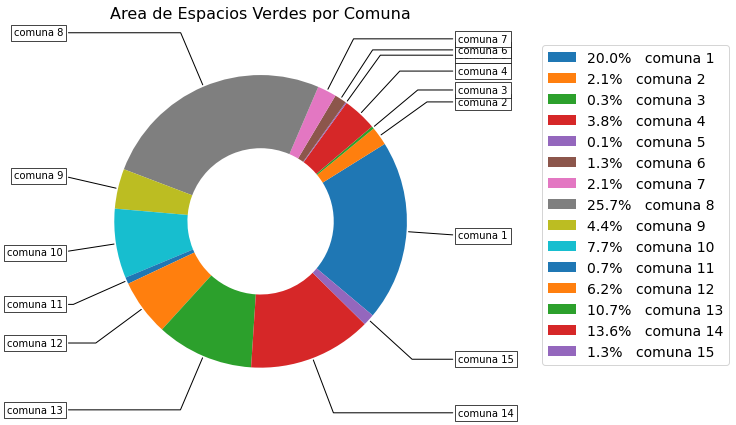

In [86]:
pie_chart(data=mevxc['area'], categorias=mevxc['comuna'], title='Area de Espacios Verdes por Comuna')

**Las comunas 1, 8 y 14 se llevan la mayor parte del total de área en espacios verdes. Luego las comunas 5, 3, 11 y 15 tienen una mínima porción**

In [83]:
ordenevt = evt[evt.clasificac == "PARQUE" ].sort_values('area',ascending=False) 
ordenevt

WKT  \
805   MULTIPOLYGON (((-58.4607358822111 -34.67093269...   
1423  MULTIPOLYGON (((-58.4415609270108 -34.67758243...   
971   MULTIPOLYGON (((-58.4564024960668 -34.68512295...   
553   MULTIPOLYGON (((-58.4492409998454 -34.66601182...   
1171  MULTIPOLYGON (((-58.4411748729202 -34.54610700...   
551   MULTIPOLYGON (((-58.4970463240198 -34.56284264...   
802   MULTIPOLYGON (((-58.4563481819296 -34.52698361...   
739   MULTIPOLYGON (((-58.4776103883384 -34.64870037...   
112   MULTIPOLYGON (((-58.4045696562691 -34.56358012...   
758   MULTIPOLYGON (((-58.3502615614609 -34.61153721...   
1424  MULTIPOLYGON (((-58.4419167071074 -34.68164096...   
737   MULTIPOLYGON (((-58.4421779825419 -34.63123448...   
1144  MULTIPOLYGON (((-58.4391103993449 -34.54828918...   
736   MULTIPOLYGON (((-58.4358218321754 -34.60458838...   
122   MULTIPOLYGON (((-58.4808456354283 -34.55202186...   
738   MULTIPOLYGON (((-58.4063090277191 -34.64029387...   
800   MULTIPOLYGON (((-58.5073748682575 -34.56754791...   
267   MULTIPOLYGON (((-58.4742391114302 -34.59398515...   
226   MULTIPOLYGON (((-58.4566711914253 -34.65071206...   
779   MULTIPOLYGON (((-58.4421052305005 -34.54838573...   
1142  MULTIPOLYGON (((-58.361439443442 -34.605616246...   
972   MULTIPOLYGON (((-58.5027617202044 -34.65766890...   
740   MULTIPOLYGON (((-58.4483159115856 -34.59216985...   
968   MULTIPOLYGON (((-58.4082771849916 -34.58526257...   
1021  MULTIPOLYGON (((-58.3586557564303 -34.61347769...   
1170  MULTIPOLYGON (((-58.4374620570157 -34.54006755...   
965   MULTIPOLYGON (((-58.3853313453183 -34.58647687...   
745   MULTIPOLYGON (((-58.3690657081248 -34.62537791...   
784   MULTIPOLYGON (((-58.5037125795582 -34.56377238...   
978   MULTIPOLYGON (((-58.4307423379783 -34.54847273...   
1134  MULTIPOLYGON (((-58.3869796542118 -34.63350585...   
1245  MULTIPOLYGON (((-58.505400955684 -34.562204438...   
967   MULTIPOLYGON (((-58.4336615625331 -34.61743120...   
417   MULTIPOLYGON (((-58.3889209979962 -34.64965579...   
759   MULTIPOLYGON (((-58.4127035836401 -34.64229136...   
132   MULTIPOLYGON (((-58.3940496263873 -34.63561059...   
1257  MULTIPOLYGON (((-58.3668183228641 -34.63428051...   
1239  MULTIPOLYGON (((-58.4124849200366 -34.56851413...   
1460  MULTIPOLYGON (((-58.5148570359062 -34.64795565...   
1283  MULTIPOLYGON (((-58.3582473895066 -34.61758933...   
1189  MULTIPOLYGON (((-58.3692632284041 -34.60897202...   
1556  MULTIPOLYGON (((-58.4604801909323 -34.58585532...   
1727  MULTIPOLYGON (((-58.3679544979871 -34.60904171...   
1425  MULTIPOLYGON (((-58.4295650984488 -34.58235201...   
916   MULTIPOLYGON (((-58.360569088292 -34.613656590...   
1282  MULTIPOLYGON (((-58.5141491734743 -34.59487338...   
1401  MULTIPOLYGON (((-58.4907991413139 -34.67226729...   
1691  MULTIPOLYGON (((-58.4137310134261 -34.60806603...   
861   MULTIPOLYGON (((-58.3637242062156 -34.60027204...   
2     MULTIPOLYGON (((-58.4448074253007 -34.57987067...   
1731  MULTIPOLYGON (((-58.4926039790953 -34.67137401...   
1483  MULTIPOLYGON (((-58.4369828835561 -34.60609161...   
1256  MULTIPOLYGON (((-58.4367058187574 -34.60835351...   
495   MULTIPOLYGON (((-58.4606768298411 -34.67494741...   
454   MULTIPOLYGON (((-58.4606935724337 -34.67494281...   
395   MULTIPOLYGON (((-58.3988650369597 -34.57027050...   

                                                 nombre clasificac patio_de_j  \
805                                Parque Indoamericano     PARQUE         SI   
1423                 Pque. Polidep. Pdte. Julio A. Roca     PARQUE        NaN   
971                             Parque de las Victorias     PARQUE         SI   
553                                     Ciudad del Rock     PARQUE        NaN   
1171                               Ciudad Universitaria     PARQUE         NO   
551                         Parque Presidente Sarmiento     PARQUE        NaN   
802                                 Parque de los Niños     PARQUE        NaN   
739                                   Pa

## Geopandas

In [34]:
ev = ev.drop(["nombre_ev", "apadrinada", "observacio", "fuente_geo", "fuente_ins", "decreto", "fecha_decr", "ordenanza_", "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", "mant_2017", "tareas", "estado", "sup_total", "canil", "posta_aero", "etiqueta", "reja", "horario_invierno", "horario_verano", "obs_reja"], axis = 1)

NameError: name 'ev' is not defined

## Se continuo realizando gráficos de mapas para entender la distribucion y clasificacion de los distintos espacios verdes en la ciudad de buenos aires

### Grafico de espacios verdes en la ciudad segun su clasificacion

In [ ]:
gplt.choropleth(ev, hue = ev['clasificac'], figsize = (20,16), legend = True)

### Grafico de espacios verdes, con escala de colores segun su area

In [ ]:
naranja = 'OrRd'
gplt.choropleth(ev, hue = ev['area'], cmap = naranja, figsize = (20,16))

**Se probaron distintas formas para graficar lo mismo:**

In [ ]:
ev.plot(figsize = (20,16))

In [ ]:
ev.plot(column='clasificac', legend=True, figsize= (16,12))

**Se puede notar que los parques, plazoletas y plazas son los predominantes en la ciudad**

Tambien se separó por espacios con mayor area total para poder visualizarlo mejor. ***La leyenda indica area total***

In [ ]:
clasif = ev.dissolve(by='clasificac', aggfunc='sum')
clasif.plot(column = 'area', scheme='quantiles', legend=True, figsize = (15,11));

### Luego se grafico solo un tipo de espacios verdes para entender la distribucion de cada uno

PLAZAS

In [ ]:
ax = ev[ev.clasificac == 'PLAZA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PLAZOLETAS

In [ ]:
ax = ev[ev.clasificac == 'PLAZOLETA'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

PARQUES

In [ ]:
ax = ev[ev.clasificac == 'PARQUE'].plot(color='white', edgecolor='black')
ax.plot(ax=ax, color='red', figsize = (18,12))
plt.show()

#### Se puede notar una gran cantidad de plazas y plazoletas bastante distribuidas a lo largo de la ciudad, sin embargo parece los parques parecen no estar del todo distribuidos, dejando zonas carenciadas de los mismos.

Y como vimos previamente si bien plazoletas hay muchas no aportan mucha área. Un gran determinante de si la comuna tiene un buen nivel de espacios verdes es si hay parques en la misma

### Se procedio a analizar las comunas

In [49]:
gplt.choropleth(com, hue = com['comuna'], figsize = (20,16))

NameError: name 'gplt' is not defined

## Concatenar datasets

Se unió la columna de area de espacios verdes al dataset de comuna, recordar:
- "area" equivale a area de espacios verdes
- "areac" equivale al area total de la comuna

Se convierte el formato de la columna en string

In [87]:
mevxc = evt.groupby(["comuna"]).area.sum()
mevxc = mevxc.reset_index()
mevxc["comuna"] = mevxc["comuna"].astype("int")
mevxc["comuna"] = mevxc["comuna"].astype("str")
mevxc.head()

comuna         area
0      1  3253933.974
1      2   336135.186
2      3    45904.233
3      4   614307.522
4      5    20884.801

Se concatenan los datos

In [88]:
evxcom = com.merge(mevxc, left_on="comuna", right_on="comuna", how='inner')
evxcom.head()

NameError: name 'com' is not defined

Se genera el gráfico degradado segun cantidad de M2 de espacios verdes por comuna

In [ ]:
gplt.choropleth(evxcom, hue = evxcom['area'], cmap = 'OrRd', figsize = (20,16), legend = True)

## Conclusion parcial

***Creemos que si bien los datasets no contienen muchas features cuantificables, con los datos de áreas de espacios verdes y formas geométricas tanto de espacios como comunas, se pueden realizar análisis útiles y específicos. Además se tiene pensado unirlo con datasets de densidad poblacional por comuna y con el financiamiento que cada una recibe, para hacer un análisis más global.***

# Poblacion Ciudad Autónoma de Buenos Aires

Analizaremos la poblacion en C.A.B.A.,su distribución y evolución para poder comprender mejor la problematica de espacios verdes que posee la misma. Esta información es sumamente revelante para poder responder nuestros objetivos.

## Importamos el dataset


El dataset lo obtuvimos de la página del Gobierno de la Ciudad.

Contiene la cantidad de habitantes en CABA desde 2015 a 2020. Como asi tambien la estimacion poblacional hasta el año 2025.

In [130]:
urlpob = 'https://raw.githubusercontent.com/brianreinke95/TP_Grupo0_Ciencia_Datos/main/datasets/Estimacion_Poblacion_nuevo.xlsx'
poblacion = pd.read_excel(urlpob, error_bad_lines=False)

In [109]:
# desde colab
poblacion = pd.read_csv("Estimacion_Poblacion_nuevo.csv")

FileNotFoundError: [Errno 2] File Estimacion_Poblacion_nuevo.csv does not exist: 'Estimacion_Poblacion_nuevo.csv'

In [145]:
poblacion = poblacion[poblacion['AÑO'] <=2020]

**Una vez cargado el dataset, observamos la cantidad de filas y columnas**

In [131]:
np.shape(poblacion)

(396, 19)

**Visualizamos los primeros renglones del dataset de población**

In [132]:
poblacion.head()

Grupo de edad (años)    Total       1      2      3       4      5      6  \
0                Total  1426582  123030  66915  90417  113113  85451  83865   
1                  0-4   108023    8902   3819   6405   10301   5797   5806   
2                  5-9   105680    7939   3568   6198   10183   5868   5545   
3                10-14    99209    7592   3347   5858   10054   5384   4955   
4                15-19    94542    7654   4005   5626    8996   5262   4770   

        7       8      9     10     11     12      13      14     15    SEXO  \
0  112134  106508  81816  79581  89555  99162  107341  102439  85255  Hombre   
1    9568   11768   6465   5743   6041   7305    7635    6518   5950  Hombre   
2    9274   11335   6865   6192   6603   7002    6956    5957   6195  Hombre   
3    8764   10616   6658   5488   6390   6402    6446    5523   5732  Hombre   
4    8086    9369   5845   5426   5779   6079    6237    5819   5589  Hombre   

    AÑO  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015

**Exploramos las columnas del dataframe**

In [133]:
poblacion.columns

Index(['Grupo de edad (años)',                'Total',                      1,
                            2,                      3,                      4,
                            5,                      6,                      7,
                            8,                      9,                     10,
                           11,                     12,                     13,
                           14,                     15,                 'SEXO',
                        'AÑO'],
      dtype='object')

**Analizamos si existen NaNs**

In [134]:
col_nulls = poblacion.isnull().any()
col_nulls

Grupo de edad (años)    False
Total                   False
1                       False
2                       False
3                       False
4                       False
5                       False
6                       False
7                       False
8                       False
9                       False
10                      False
11                      False
12                      False
13                      False
14                      False
15                      False
SEXO                    False
AÑO                     False
dtype: bool

## Modificamos las nombres de las columnas 

Para poder visualizar mejor los resultados la identificacion de comuna solamente con su numero no es conviente. Debido a esto procedemos a modificar los enncabezados.
Modificamos la columna del rango de edad para que sea mas cómodo su uso.

In [135]:
poblacion.columns = [str(x) for x in poblacion.columns]
poblacion = poblacion.rename(columns={'Grupo de edad (años)':'Rango Etario',
                          '1':'Comuna 1', '2':'Comuna 2', '3':'Comuna 3', '4':'Comuna 4', '5':'Comuna 5',
                          '6':'Comuna 6', '7':'Comuna 7', '8':'Comuna 8', '9':'Comuna 9', '10':'Comuna 10',
                          '11':'Comuna 11', '12':'Comuna 12', '13':'Comuna 13', '14':'Comuna 14',
                          '15':'Comuna 15',}) 

In [136]:
poblacion.columns

Index(['Rango Etario', 'Total', 'Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4',
       'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10',
       'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15', 'SEXO',
       'AÑO'],
      dtype='object')

**Observamos como queda nuestro dataset con los cambios efectuados**

In [137]:
poblacion.head()

Rango Etario    Total  Comuna 1  Comuna 2  Comuna 3  Comuna 4  Comuna 5  \
0        Total  1426582    123030     66915     90417    113113     85451   
1          0-4   108023      8902      3819      6405     10301      5797   
2          5-9   105680      7939      3568      6198     10183      5868   
3        10-14    99209      7592      3347      5858     10054      5384   
4        15-19    94542      7654      4005      5626      8996      5262   

   Comuna 6  Comuna 7  Comuna 8  Comuna 9  Comuna 10  Comuna 11  Comuna 12  \
0     83865    112134    106508     81816      79581      89555      99162   
1      5806      9568     11768      6465       5743       6041       7305   
2      5545      9274     11335      6865       6192       6603       7002   
3      4955      8764     10616      6658       5488       6390       6402   
4      4770      8086      9369      5845       5426       5779       6079   

   Comuna 13  Comuna 14  Comuna 15    SEXO   AÑO  
0     107341     102439      85255  Hombre  2015  
1       7635       6518       5950  Hombre  2015  
2       6956       5957       6195  Hombre  2015  
3       6446       5523       5732  Hombre  2015  
4       6237       5819       5589  Hombre  2015

In [138]:
poblacion = poblacion.set_index('Rango Etario')

## Eliminamos los subtotales

El dataset contiene todos los subtotales de cada año de la poblacion en la Ciudad.
A la hora de realizar diferentes análisis y conclusiones esas filas pueden dar lugar a discusión. Además de necesitarlos, estos valores se puedne obtener por medio del código. Teniendo esto en cuenta optamos por eliminarlas.

In [139]:
poblacion.index

Index(['Total', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44',
       ...
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80 y más'],
      dtype='object', name='Rango Etario', length=396)

In [140]:
poblacion = poblacion.drop('Total')

In [141]:
poblacion.head(2)

Total  Comuna 1  Comuna 2  Comuna 3  Comuna 4  Comuna 5  \
Rango Etario                                                             
0-4           108023      8902      3819      6405     10301      5797   
5-9           105680      7939      3568      6198     10183      5868   

              Comuna 6  Comuna 7  Comuna 8  Comuna 9  Comuna 10  Comuna 11  \
Rango Etario                                                                 
0-4               5806      9568     11768      6465       5743       6041   
5-9               5545      9274     11335      6865       6192       6603   

              Comuna 12  Comuna 13  Comuna 14  Comuna 15    SEXO   AÑO  
Rango Etario                                                            
0-4                7305       7635       6518       5950  Hombre  2015  
5-9                7002       6956       5957       6195  Hombre  2015

## Evolución de habitantes en la Ciudad Autónoma de Buenos Aires

Observamos como vario la población a lo largo de los años como asi tambien la estimación propia del Gobierno de la Ciudad.

In [146]:
pobl_año= poblacion.groupby("AÑO").sum()
pobl_año

Total  Comuna 1  Comuna 2  Comuna 3  Comuna 4  Comuna 5  Comuna 6  \
AÑO                                                                         
2015  3054267    250770    149985    192375    237769    186512    184363   
2016  3059122    252053    149848    192573    238303    186740    184611   
2017  3063728    253271    149720    192763    238809    186956    184846   
2018  3068043    254408    149607    192945    239279    187159    185067   
2019  3072029    255457    149510    193115    239712    187348    185271   
2020  3075646    256405    149430    193276    240100    187518    185456   

      Comuna 7  Comuna 8  Comuna 9  Comuna 10  Comuna 11  Comuna 12  \
AÑO                                                                   
2015    239597    224770    170087     170037     189925     213218   
2016    240116    225737    170353     170163     189956     213576   
2017    240607    226649    170605     170282     189986     213914   
2018    241065    227495    170842     170394     190016     214229   
2019    241484    228266    171062     170497     190046     214518   
2020    241861    228953    171264     170592     190076     214777   

      Comuna 13  Comuna 14  Comuna 15  
AÑO                                    
2015     235666     226821     182372  
2016     235819     226884     182390  
2017     235967     226944     182409  
2018     236107     227003     182427  
2019     236238     227060     182445  
2020     236358     227115     182465

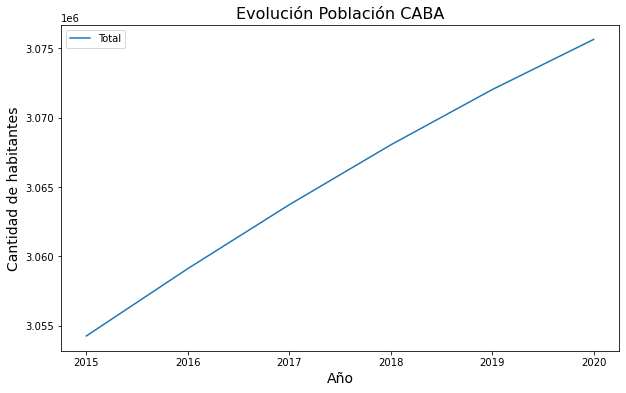

In [152]:
plt.figure(figsize=(10,6))
plt.plot(pobl_año.index, pobl_año['Total'], label='Total');

plt.legend(loc='upper left')
plt.title('Evolución Población CABA', fontsize=16)
plt.ylabel('Cantidad de habitantes', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.show()

## Filtro mi dataset con la información del año 2020

La informacion del año 2020 será de gran utilidad para analizar la situación actual de la Ciudad.

In [153]:
pobl_2020 = poblacion.loc[poblacion.AÑO == 2020]

In [154]:
pobl_2020.head(10)

Total  Comuna 1  Comuna 2  Comuna 3  Comuna 4  Comuna 5  \
Rango Etario                                                             
0-4           105015      8886      3660      6213     10058      5612   
5-9           103973      8022      3462      6087     10066      5751   
10-14         102081      8023      3396      6016     10394      5518   
15-19          97651      8121      4079      5802      9338      5415   
20-24          96245     10182      5946      6790      7960      5537   
25-29         104083     11163      6041      7434      7926      6544   
30-34         113301     11068      5259      7774      8258      7361   
35-39         111570     10202      4586      7272      8392      6945   
40-44         108302      9710      4287      7130      8564      6714   
45-49          96849      8594      4087      6182      7103      5936   

              Comuna 6  Comuna 7  Comuna 8  Comuna 9  Comuna 10  Comuna 11  \
Rango Etario                                                                 
0-4               5614      9325     11680      6266       5523       5784   
5-9               5428      9150     11389      6736       6028       6400   
10-14             5073      9043     11153      6831       5587       6476   
15-19             4902      8377      9885      6022       5546       5881   
20-24             4795      7587      8197      5020       4735       5123   
25-29             5755      7724      7777      5078       4998       5664   
30-34             6953      8220      7548      5728       5691       6537   
35-39             7030      8472      7557      6135       5943       6891   
40-44             6527      8163      7530      6303       5874       6868   
45-49             6002      7323      6189      5466       5689       6498   

              Comuna 12  Comuna 13  Comuna 14  Comuna 15    SEXO   AÑO  
Rango Etario                                                            
0-4                7073       7343       6271       5707  Hombre  2020  
5-9                6863       6773       5803       6015  Hombre  2020  
10-14              6562       6564       5625       5820  Hombre  2020  
15-19              6257       6376       5952       5698  Hombre  2020  
20-24              5628       6170       7277       5298  Hombre  2020  
25-29              6520       7204       8277       5978  Hombre  2020  
30-34              8300       8675       8819       7110  Hombre  2020  
35-39              8245       8943       8144       6813  Hombre  2020  
40-44              7706       8435       7932       6559  Hombre  2020  
45-49              7148       7586       6931       6115  Hombre  2020

**Observamos la cantidad total de habitantes en la Ciudad**

In [162]:
print(f"Población total año 2020: {pobl_2020['Total'].sum()} personas")

Población total año 2020: 3075646 personas


### Separamos la informacion por sexo y graficamos a la proporcion de hombres y mujeres 

In [166]:
pobl_2020_sexo = pobl_2020_sexo.drop(columns=['AÑO'])

In [167]:
pobl_2020_sexo= pobl_2020.groupby("SEXO").sum()
pobl_2020_sexo

Total  Comuna 1  Comuna 2  Comuna 3  Comuna 4  Comuna 5  Comuna 6  \
SEXO                                                                          
Hombre  1444545    127651     66707     91310    114957     86312     84790   
Mujer   1631101    128754     82723    101966    125143    101206    100666   

        Comuna 7  Comuna 8  Comuna 9  Comuna 10  Comuna 11  Comuna 12  \
SEXO                                                                    
Hombre    113923    109653     82856      80065      89756     100392   
Mujer     127938    119300     88408      90527     100320     114385   

        Comuna 13  Comuna 14  Comuna 15    AÑO  
SEXO                                            
Hombre     107991     102784      85398  34340  
Mujer      128367     124331      97067  34340

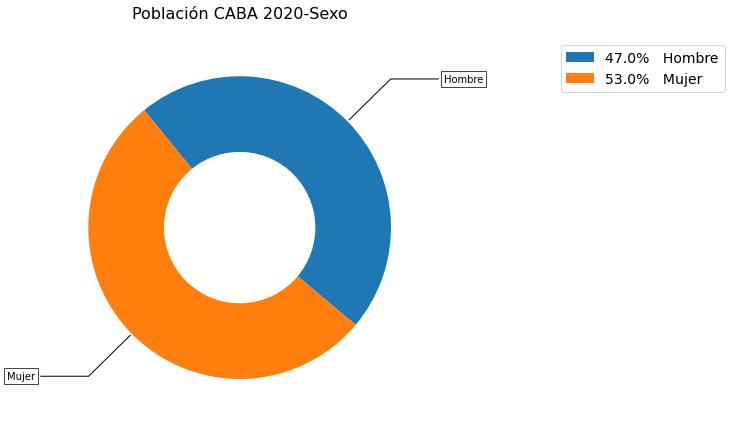

In [171]:
pie_chart(data=pobl_2020_sexo['Total'], categorias=pobl_2020_sexo.index, title='Población CABA 2020-Sexo')

### Transponemos la data del 2020 para obtener una visualización de la cantidad de habitantes por comuna en la Ciudad.

In [190]:
pobl_2020_tr = pobl_2020.T
pobl_2020_tr = pobl_2020_tr.drop(['SEXO', 'AÑO'])
pobl_2020_tr = pobl_2020_tr.apply(sum, axis=1)
pobl_2020_tr.columns = ['poblacion']

In [192]:
pobl_2020_tr = pobl_2020_tr.drop('Total')

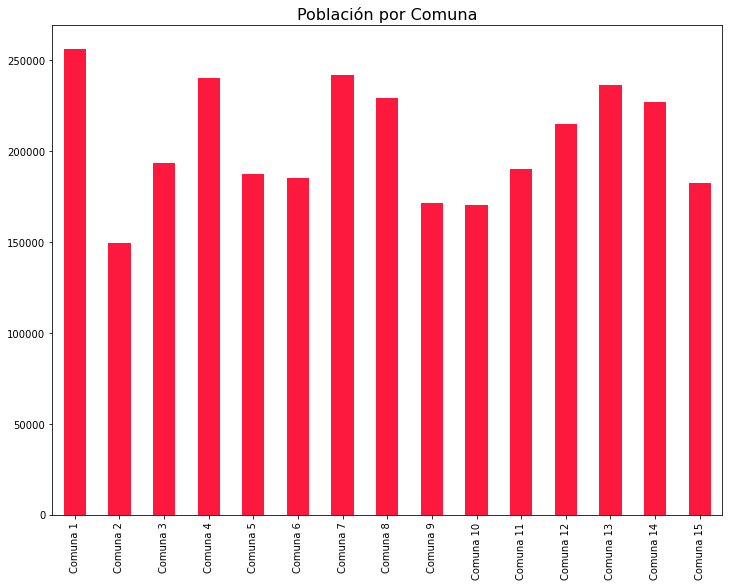

In [196]:
pobl_2020_tr.plot(kind='bar', y='poblacion', subplots=True, figsize=(12,9),color='#fd183d')
plt.title("Población por Comuna", fontsize=16)
plt.show()

### Luego observamos la distribucion de la población de la Ciudad según su rango de edad y comuna

In [197]:
pobl_2020_edad= pobl_2020.groupby("Rango Etario").sum()
pobl_2020_edad

Total  Comuna 1  Comuna 2  Comuna 3  Comuna 4  Comuna 5  \
Rango Etario                                                             
0-4           204007     16861      6938     11801     19461     10883   
10-14         198935     15385      6572     11521     20264     10770   
15-19         192179     15614      8549     11364     18444     10591   
20-24         193088     19455     13077     13598     15686     11095   
25-29         211953     21637     12987     14838     15905     13476   
30-34         232275     20932     11183     15342     17158     15252   
35-39         229085     19717      9614     14775     17131     14626   
40-44         223548     18866      9301     14358     17360     13957   
45-49         203306     16904      9027     12935     14981     12617   
5-9           202200     15411      6677     11577     19756     11004   
50-54         169027     14062      8018     10400     12117     10730   
55-59         157343     12719      8243      9970     10961     10054   
60-64         153265     12041      8752      9453      9866      9770   
65-69         138735     10671      8308      8562      8845      8850   
70-74         122012      8851      7248      7519      7809      7766   
75-79          97501      6796      5459      6072      6128      6184   
80 y más      147187     10483      9477      9191      8228      9893   

              Comuna 6  Comuna 7  Comuna 8  Comuna 9  Comuna 10  Comuna 11  \
Rango Etario                                                                 
0-4              11024     17965     23067     12133      10834      11311   
10-14             9941     17734     22084     12907      11316      12333   
15-19             9690     16386     19853     11722      10741      11448   
20-24             9744     15162     16573      9696       9447       9870   
25-29            12029     15599     15492     10035      10036      11166   
30-34            14649     17019     15504     11373      11632      13255   
35-39            14743     17158     15608     12253      12202      14018   
40-44            13790     17064     15517     12587      12301      14318   
45-49            12793     15517     13054     11270      11931      13435   
5-9              10716     17921     22515     12892      11591      12524   
50-54            11186     13048      9717      9264      10190      11419   
55-59            10477     11856      8385      8609       9391      10480   
60-64            10327     11351      7821      8321       8937      10164   
65-69             9193     10154      7027      7650       7849       9183   
70-74             8119      9077      6337      6893       7310       8086   
75-79             6488      7430      4864      5757       6018       6724   
80 y más         10547     11420      5535      7902       8866      10342   

              Comuna 12  Comuna 13  Comuna 14  Comuna 15   AÑO  
Rango Etario                                                    
0-4               13906      14133      12450      11240  4040  
10-14             12846      12645      11106      11511  4040  
15-19             12158      12388      12251      10980  4040  
20-24             11056      12621      15511      10497  4040  
25-29             13443      15402      17706      12202  4040  
30-34             17225      18588      18593      14570  4040  
35-39             17082      18905      17248      14005  4040  
40-44             15891      17774      16761      13703  4040  
45-49             14902      16077      14951      12912  4040  
5-9               13529      13164      11364      11559  4040  
50-54             12534      13464      12553      10325  4040  
55-59             11329      12840      12391       9638  4040  
60-64             11338      13315      12502       9307  4040  
65-69             10258      12351      11709       8125  4040  
70-74              9045      10578      10126       7248  4040  
75-79              7

In [66]:
pobl_2020_edad.index

Index(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '5-9', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 y más'],
      dtype='object', name='Rango Etario')

**Cambiamos el orden de mis index para poder visualizar en orden los rangos etarios**

In [198]:
pobl_2020_edad=pobl_2020_edad.reindex(index  =['0-4','5-9','10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
                                               '40-44','45-49','50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
                                               '80 y más'])
pobl_2020_edad

Total  Comuna 1  Comuna 2  Comuna 3  Comuna 4  Comuna 5  \
Rango Etario                                                             
0-4           204007     16861      6938     11801     19461     10883   
5-9           202200     15411      6677     11577     19756     11004   
10-14         198935     15385      6572     11521     20264     10770   
15-19         192179     15614      8549     11364     18444     10591   
20-24         193088     19455     13077     13598     15686     11095   
25-29         211953     21637     12987     14838     15905     13476   
30-34         232275     20932     11183     15342     17158     15252   
35-39         229085     19717      9614     14775     17131     14626   
40-44         223548     18866      9301     14358     17360     13957   
45-49         203306     16904      9027     12935     14981     12617   
50-54         169027     14062      8018     10400     12117     10730   
55-59         157343     12719      8243      9970     10961     10054   
60-64         153265     12041      8752      9453      9866      9770   
65-69         138735     10671      8308      8562      8845      8850   
70-74         122012      8851      7248      7519      7809      7766   
75-79          97501      6796      5459      6072      6128      6184   
80 y más      147187     10483      9477      9191      8228      9893   

              Comuna 6  Comuna 7  Comuna 8  Comuna 9  Comuna 10  Comuna 11  \
Rango Etario                                                                 
0-4              11024     17965     23067     12133      10834      11311   
5-9              10716     17921     22515     12892      11591      12524   
10-14             9941     17734     22084     12907      11316      12333   
15-19             9690     16386     19853     11722      10741      11448   
20-24             9744     15162     16573      9696       9447       9870   
25-29            12029     15599     15492     10035      10036      11166   
30-34            14649     17019     15504     11373      11632      13255   
35-39            14743     17158     15608     12253      12202      14018   
40-44            13790     17064     15517     12587      12301      14318   
45-49            12793     15517     13054     11270      11931      13435   
50-54            11186     13048      9717      9264      10190      11419   
55-59            10477     11856      8385      8609       9391      10480   
60-64            10327     11351      7821      8321       8937      10164   
65-69             9193     10154      7027      7650       7849       9183   
70-74             8119      9077      6337      6893       7310       8086   
75-79             6488      7430      4864      5757       6018       6724   
80 y más         10547     11420      5535      7902       8866      10342   

              Comuna 12  Comuna 13  Comuna 14  Comuna 15   AÑO  
Rango Etario                                                    
0-4               13906      14133      12450      11240  4040  
5-9               13529      13164      11364      11559  4040  
10-14             12846      12645      11106      11511  4040  
15-19             12158      12388      12251      10980  4040  
20-24             11056      12621      15511      10497  4040  
25-29             13443      15402      17706      12202  4040  
30-34             17225      18588      18593      14570  4040  
35-39             17082      18905      17248      14005  4040  
40-44             15891      17774      16761      13703  4040  
45-49             14902      16077      14951      12912  4040  
50-54             12534      13464      12553      10325  4040  
55-59             11329      12840      12391       9638  4040  
60-64             11338      13315      12502       9307  4040  
65-69             10258      12351      11709       8125  4040  
70-74              9045      10578      10126       7248  4040  
75-79              7

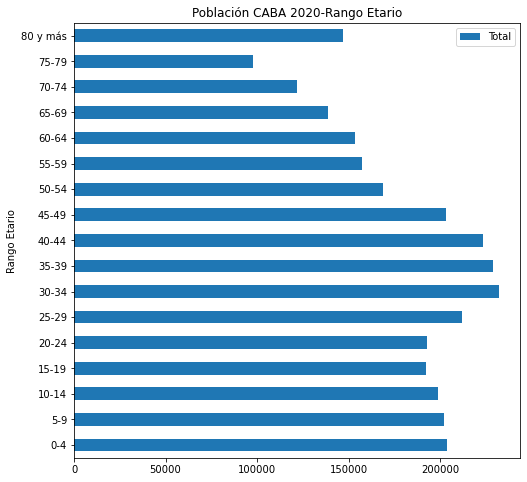

In [201]:
pobl_2020_edad.plot(kind = "barh",y="Total", figsize = (8,8), title ="Población CABA 2020-Rango Etario")

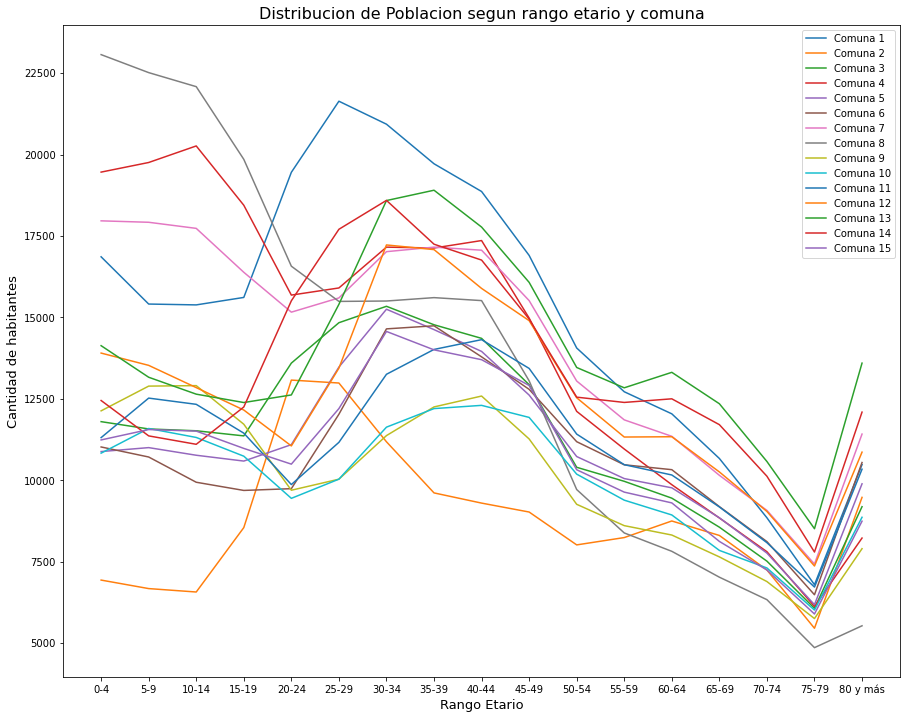

In [207]:
plt.figure(figsize=(15,12))
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 1'], label='Comuna 1');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 2'], label='Comuna 2');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 3'], label='Comuna 3');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 4'], label='Comuna 4');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 5'], label='Comuna 5');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 6'], label='Comuna 6');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 7'], label='Comuna 7');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 8'], label='Comuna 8');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 9'], label='Comuna 9');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 10'], label='Comuna 10');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 11'], label='Comuna 11');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 12'], label='Comuna 12');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 13'], label='Comuna 13');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 14'], label='Comuna 14');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 15'], label='Comuna 15');

plt.legend(loc='upper right')
plt.title('Distribucion de Poblacion segun rango etario y comuna', fontsize=16)
plt.ylabel('Cantidad de habitantes', fontsize=13)
plt.xlabel('Rango Etario', fontsize=13)
plt.show()

# EDA presupuestos

Al igual que el análisis de Población este de Presupuestos se utiliza como un complemento del análisis de Espacios Verdes. 
Se busca obtener insights que relacionen la cantidad presupuestada a los proyectos de espacios verdes con la calidad de los mismos por comuna

Links: https://data.buenosaires.gob.ar/dataset/presupuesto-sancionado

# Lectura de la base unificada y selección de los campos a analizar

La base contiene todos los gastos que demande el desenvolvimiento de los órganos del gobierno central, de los entes descentralizados y comunas, el servicio de la deuda pública, las inversiones patrimoniales y los recursos para cubrir tales erogaciones. Los recursos publicados detallan la distribución de los créditos aprobados al máximo nivel de desagregación.

De todas las áreas querremos analizar la destinada a espacios verdes.

In [ ]:
# Desde colab
pres1 = pd.read_csv("presupuesto_sancionado_clean_1.csv")
pres2 = pd.read_csv("presupuesto_sancionado_clean_2.csv")
pres3 = pd.read_csv("presupuesto_sancionado_clean_3.csv")
pres4 = pd.read_csv("presupuesto_sancionado_clean_4.csv")
pres5 = pd.read_csv("presupuesto_sancionado_clean_5.csv")
pres6 = pd.read_csv("presupuesto_sancionado_clean_6.csv")
pres7 = pd.read_csv("presupuesto_sancionado_clean_7.csv")
pres8 = pd.read_csv("presupuesto_sancionado_clean_8.csv")
pres9 = pd.read_csv("presupuesto_sancionado_clean_9.csv")
pres10 = pd.read_csv("presupuesto_sancionado_clean_10.csv")
presupuesto_sancionado = pd.concat([pres1, pres2, pres3, pres4, pres5, pres6, pres7, pres8, pres9, pres10],
                                   ignore_index=True)

In [208]:
# Desde jupyter
list_pres_part = []
for i in range(1, 11):
    url_presp = path_to_datasets + f'presupuesto_partido/presupuesto_sancionado_clean_{i}.csv'
    list_pres_part.append(pd.read_csv(url_presp))
presupuesto_sancionado = pd.concat(list_pres_part, axis=0)

In [515]:
presupuesto_sancionado.shape

(640405, 22)

In [209]:
presupuesto_sancionado['SANCION'] = presupuesto_sancionado['SANCION'].astype(float)

In [210]:
presupuesto_sancionado = presupuesto_sancionado.loc[presupuesto_sancionado['SANCION'] != 0]
presupuesto_sancionado = presupuesto_sancionado.loc[presupuesto_sancionado['AÑO'] > 2009]

In [211]:
presupuesto_sancionado.AÑO.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [212]:
presupuesto_sancionado.shape

(401068, 22)

In [213]:
cols = presupuesto_sancionado.dtypes[(presupuesto_sancionado.dtypes == 'object')].index
for col in cols:
    presupuesto_sancionado[col] = presupuesto_sancionado[col].astype(str)

**El Ministerio de Ambiente pasa a ser una secretaria en 2020 bajo la dependencia de la Jefatura de Gobierno**

In [214]:
jef_gob = presupuesto_sancionado.groupby('JURISDICCION').get_group("JEFATURA DE GOBIERNO")
sec_ambiente = jef_gob.groupby('SUBJURISDICCION').get_group("SECRETARIA DE AMBIENTE")
min_ambiente = presupuesto_sancionado.groupby('JURISDICCION').get_group("MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO")

ambiente = pd.concat([min_ambiente, sec_ambiente])

In [215]:
ambiente['JURISDICCION'].value_counts()

MINISTERIO DE AMBIENTE Y ESPACIO PUBLICO    40142
JEFATURA DE GOBIERNO                         1248
Name: JURISDICCION, dtype: int64

In [216]:
ambiente['FUNCION'].value_counts()

SERVICIOS URBANOS                17757
ECOLOGIA                         17417
AGUA POTABLE Y ALCANTARILLADO     1486
SEGURIDAD INTERIOR                1480
TRABAJO                           1289
INDUSTRIA Y COMERCIO              1255
DIRECCION EJECUTIVA                340
CONTROL DE LA GESTION              194
PROMOCION Y ACCION SOCIAL           83
EDUCACION                           51
SALUD                               38
Name: FUNCION, dtype: int64

In [217]:
ecologia = ambiente[ambiente['FUNCION'] == 'ECOLOGIA']
ecologia = ecologia.T.drop_duplicates().T  # Elimino columnas que contienen la misma información.

In [218]:
ecologia.shape

(17417, 21)

In [219]:
def repr_high_values(series):

        series = series.apply(lambda x: f"${x:,.0f}" if not pd.isnull(x) else x)
        series = series.str.replace(",", ".")

        return series

In [220]:
def repr_sancion_by_subset(df, subset):

    sancion_by_subset = df.groupby(subset).agg({'SANCION': 'sum'})\
                                .sort_values(by='SANCION', ascending=False)
    
    sancion_by_subset['SANCION_repr'] = repr_high_values(sancion_by_subset['SANCION'])
    
    return sancion_by_subset

In [221]:
ecologia['SANCION'] = ecologia['SANCION'].astype(float)

In [222]:
sancion_por_unidad_ejecutora_año = ecologia.pivot_table(index='AÑO', columns='UNIDAD_EJECUTORA', values='SANCION', aggfunc='sum')
sancion_por_unidad_ejecutora_año.loc['Total'] = sancion_por_unidad_ejecutora_año.apply('sum', axis=0) 
sancion_por_unidad_ejecutora_año = sancion_por_unidad_ejecutora_año.T.sort_values(by='Total', ascending=False).T

sancion_por_unidad_ejecutora_año = sancion_por_unidad_ejecutora_año.apply(repr_high_values, axis=1).fillna('-')

sancion_por_unidad_ejecutora_año

UNIDAD_EJECUTORA DIRECCION GENERAL DE ESPACIOS VERDES  \
AÑO                                                     
2010                                     $146.668.026   
2011                                     $182.039.510   
2012                                     $222.624.631   
2013                                     $306.709.216   
2014                                     $322.560.420   
2015                                     $472.147.712   
2016                                     $572.810.988   
2017                                     $848.066.208   
2018                                   $1.000.632.878   
2019                                   $1.453.447.832   
2020                                                -   
Total                                  $5.527.707.421   

UNIDAD_EJECUTORA MINISTERIO AMBIENTE Y ESPACIO PUBLICO AGENCIA AMBIENTAL  \
AÑO                                                                        
2010                                       $38.084.880       $14.923.403   
2011                                       $68.517.305       $32.563.320   
2012                                      $100.779.083       $54.986.204   
2013                                      $169.267.432       $72.848.780   
2014                                      $193.351.900       $59.441.809   
2015                                      $234.650.667       $70.025.885   
2016                                      $454.087.661      $118.034.376   
2017                                      $253.895.885      $166.254.462   
2018                                      $237.399.998      $164.934.725   
2019                                      $286.020.781      $197.755.291   
2020                                                 -      $264.106.419   
Total                                   $2.036.055.592    $1.215.874.674   

UNIDAD_EJECUTORA DIRECCION GENERAL DE LIMPIEZA UPE ECOPARQUE  \
AÑO                                                            
2010                              $127.527.400             -   
2011                                         -             -   
2012                                         -             -   
2013                                         -             -   
2014                               $51.969.614             -   
2015                               $32.017.440             -   
2016                               $95.616.323             -   
2017                              $128.619.395             -   
2018                              $224.316.115             -   
2019                              $235.851.798             -   
2020                                         -  $735.324.504   
Total                             $895.918.085  $735.324.504   

UNIDAD_EJECUTORA DIRECCION GENERAL DE CONTROL  \
AÑO                                             
2010                              $10.766.941   
2011                              $21.151.940   
2012                              $25.179.169   
2013                              $20.069.991   
2014                              $23.531.004   
2015                              $40.675.736   
2016                              $52.159.459   
2017                              $78.202.278   
2018                              $92.794.733   
2019                             $125.344.536   
2020                             $149.731.728   
Total                            $639.607.515   

UNIDAD_EJECUTORA UPE ECOPARQUE INTERACTIVO DE LA CABA  \
AÑO                                                     
2010                                                -   
2011                                                -   
2012                                                -   
2013                                                -   
2014                                                -   
2015                                                -   
2016                                                -   
2017                                   

DIRECCION GENERAL DE ESPACIOS VERDES: https://www.buenosaires.gob.ar/gestioncomunal/institucional-subsecretaria-de-gestion-comunal/direccion-general-de

In [223]:
sancion_por_unidad_ejecutora_año[["DIRECCION GENERAL DE ESPACIOS VERDES", 'DIRECCION GENERAL DE ARBOLADO']]

UNIDAD_EJECUTORA DIRECCION GENERAL DE ESPACIOS VERDES  \
AÑO                                                     
2010                                     $146.668.026   
2011                                     $182.039.510   
2012                                     $222.624.631   
2013                                     $306.709.216   
2014                                     $322.560.420   
2015                                     $472.147.712   
2016                                     $572.810.988   
2017                                     $848.066.208   
2018                                   $1.000.632.878   
2019                                   $1.453.447.832   
2020                                                -   
Total                                  $5.527.707.421   

UNIDAD_EJECUTORA DIRECCION GENERAL DE ARBOLADO  
AÑO                                             
2010                               $43.122.015  
2011                               $64.493.450  
2012                               $61.170.726  
2013                               $30.258.926  
2014                               $23.341.940  
2015                                         -  
2016                                         -  
2017                                         -  
2018                                         -  
2019                                         -  
2020                                         -  
Total                             $222.387.057

**Los datos sobre la dirección general de arbolado están desactualizados.**

**Y Falta información del 2020 sobre espacios verdes**

### Acá filtramos la base para espacios verdes

Los datos de arbolados en principio no se usarán por estar desactualizados

In [224]:
espacios_verdes = ecologia[ecologia['UNIDAD_EJECUTORA'] == 'DIRECCION GENERAL DE ESPACIOS VERDES']

In [225]:
espacios_verdes.shape

(4226, 21)

### Sanción de presupuesto por año para Espacios Verdes

In [226]:
sancion_por_unidad_ejecutora_año[["DIRECCION GENERAL DE ESPACIOS VERDES"]].T

AÑO                                           2010          2011  \
UNIDAD_EJECUTORA                                                   
DIRECCION GENERAL DE ESPACIOS VERDES  $146.668.026  $182.039.510   

AÑO                                           2012          2013  \
UNIDAD_EJECUTORA                                                   
DIRECCION GENERAL DE ESPACIOS VERDES  $222.624.631  $306.709.216   

AÑO                                           2014          2015  \
UNIDAD_EJECUTORA                                                   
DIRECCION GENERAL DE ESPACIOS VERDES  $322.560.420  $472.147.712   

AÑO                                           2016          2017  \
UNIDAD_EJECUTORA                                                   
DIRECCION GENERAL DE ESPACIOS VERDES  $572.810.988  $848.066.208   

AÑO                                             2018            2019 2020  \
UNIDAD_EJECUTORA                                                            
DIRECCION GENERAL DE ESPACIOS VERDES  $1.000.632.878  $1.453.447.832    -   

AÑO                                            Total  
UNIDAD_EJECUTORA                                      
DIRECCION GENERAL DE ESPACIOS VERDES  $5.527.707.421

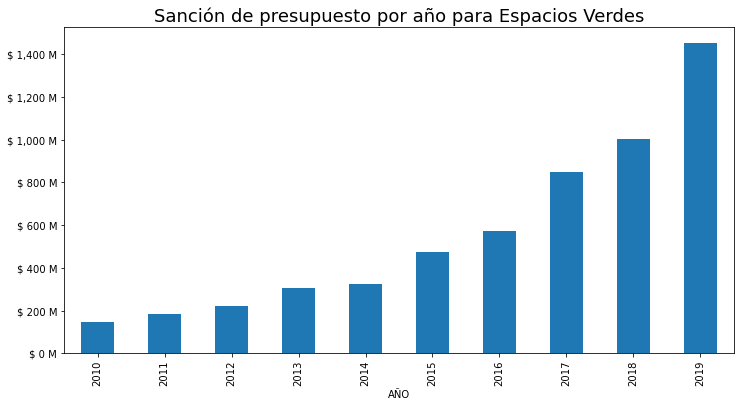

In [227]:
sancion_espacios_verdes_año = espacios_verdes.groupby('AÑO').agg({'SANCION': 'sum'})['SANCION']
g = sancion_espacios_verdes_año.plot(kind='bar', figsize=(12, 6));

ylabels = ['$ {:,.0f}'.format(x) + ' M' for x in g.get_yticks()/1000000];
g.set_yticklabels(ylabels);
plt.title("Sanción de presupuesto por año para Espacios Verdes", fontsize=18);

### Pasaremos los datos de presupuestos a valores del 2010 para ver si realmente aumentó la inversión en el área

In [228]:
# http://estudiodelamo.com/inflacion-argentina-anual-mensual-2020/

header = ["AÑO","PORC_ANUAL", "ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]
inflacion = pd.DataFrame(([ 2011,  23.97, 2.10, 1.50, 2.10, 1.80, 1.33, 1.56, 1.66, 1.85, 1.82, 1.52, 1.46, 1.86],
                          [ 2012,  25.98, 1.84, 1.79, 2.27, 2.19, 1.81, 1.63, 1.80, 1.93, 1.92, 1.72, 1.81, 2.04],
                          [ 2013,  23.28, 2.61, 1.14, 1.50, 1.43, 1.63, 2.19, 2.63, 2.14, 2.12, 2.11, 2.38, 3.30],
                          [ 2014,  38.53, 4.62, 4.31, 3.42, 2.59, 2.28, 2.20, 2.47, 2.65, 2.48, 2.25, 1.86, 1.87],
                          [ 2015,  27.50, 2.08, 1.48, 2.12, 2.01, 2.00, 1.53, 1.92, 2.17, 1.92, 1.52, 2.20, 3.80],
                          [ 2016,  40.30, 3.60, 4.80, 3.20, 6.70, 3.50, 2.90, 2.40, 0.50, 0.80, 2.90, 1.90, 1.60],
                          [ 2017,  24.80, 1.60, 2.10, 2.20, 2.10, 1.80, 1.30, 2.10, 1.50, 1.60, 1.50, 1.40, 3.10],
                          [ 2018,  47.65, 1.76, 2.42, 2.34, 2.74, 2.08, 3.74, 3.10, 3.89, 6.53, 5.39, 3.15, 2.57],
                          [ 2019,  53.83, 2.91, 3.77, 4.68, 3.44, 3.06, 2.72, 2.20, 3.95, 5.89, 3.29, 4.25, 3.74],
                          [ 2020,  36.62, 2.25, 2.01, 3.34, 1.50, 1.54, 2.24, 1.93, 2.70, 2.84,]), columns=header)

inflacion

AÑO  PORC_ANUAL   ENE   FEB   MAR   ABR   MAY   JUN   JUL   AGO   SEP  \
0  2011       23.97  2.10  1.50  2.10  1.80  1.33  1.56  1.66  1.85  1.82   
1  2012       25.98  1.84  1.79  2.27  2.19  1.81  1.63  1.80  1.93  1.92   
2  2013       23.28  2.61  1.14  1.50  1.43  1.63  2.19  2.63  2.14  2.12   
3  2014       38.53  4.62  4.31  3.42  2.59  2.28  2.20  2.47  2.65  2.48   
4  2015       27.50  2.08  1.48  2.12  2.01  2.00  1.53  1.92  2.17  1.92   
5  2016       40.30  3.60  4.80  3.20  6.70  3.50  2.90  2.40  0.50  0.80   
6  2017       24.80  1.60  2.10  2.20  2.10  1.80  1.30  2.10  1.50  1.60   
7  2018       47.65  1.76  2.42  2.34  2.74  2.08  3.74  3.10  3.89  6.53   
8  2019       53.83  2.91  3.77  4.68  3.44  3.06  2.72  2.20  3.95  5.89   
9  2020       36.62  2.25  2.01  3.34  1.50  1.54  2.24  1.93  2.70  2.84   

    OCT   NOV   DIC  
0  1.52  1.46  1.86  
1  1.72  1.81  2.04  
2  2.11  2.38  3.30  
3  2.25  1.86  1.87  
4  1.52  2.20  3.80  
5  2.90  1.90  1.60  
6  1.50  1.40  3.10  
7  5.39  3.15  2.57  
8  3.29  4.25  3.74  
9   NaN   NaN   NaN

In [229]:
inflacion_anual = inflacion.set_index('AÑO')['PORC_ANUAL'] / 100
inflacion_anual

AÑO
2011    0.2397
2012    0.2598
2013    0.2328
2014    0.3853
2015    0.2750
2016    0.4030
2017    0.2480
2018    0.4765
2019    0.5383
2020    0.3662
Name: PORC_ANUAL, dtype: float64

In [230]:
def presupuestos_a_valores_2010(sancion_espacios_verdes_año):
    presupuestos_llevados_2010 = []
    for start_year, presupuesto in sancion_espacios_verdes_año.items():
#         print('Pesos presupuestados finales del año {}:  $ {:,.0f}'.format(start_year, presupuesto))

        for tasa_inflacion in inflacion_anual.loc[start_year::-1]:

            presupuesto = presupuesto / (1+tasa_inflacion)

        presupuestos_llevados_2010.append(presupuesto)    
#         print("Pesos finales llevados a principios 2010:   $ {:,.0f}\n".format(presupuesto))

    presupuestos_llevados_2010 = pd.Series(presupuestos_llevados_2010)
    presupuestos_llevados_2010.index = sancion_espacios_verdes_año.index
    
    return presupuestos_llevados_2010

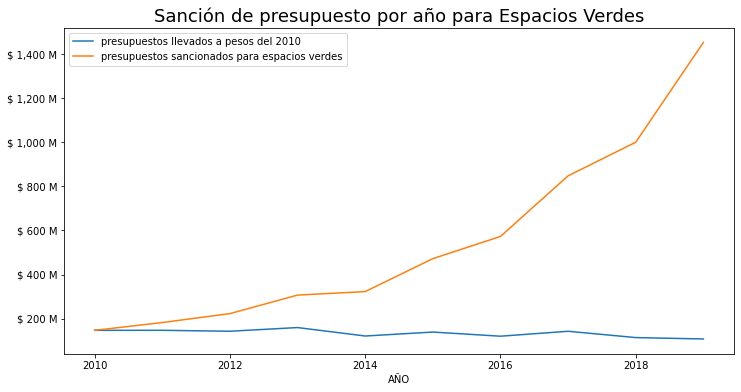

In [231]:
presupuestos_llevados_2010 = presupuestos_a_valores_2010(sancion_espacios_verdes_año)

aux = pd.concat([presupuestos_llevados_2010, sancion_espacios_verdes_año], axis=1)
aux.columns = ['presupuestos llevados a pesos del 2010', 'presupuestos sancionados para espacios verdes']
g = aux.plot(figsize=(12,6))

ylabels = ['$ {:,.0f}'.format(x) + ' M' for x in g.get_yticks()/1000000];
g.set_yticklabels(ylabels);
plt.title("Sanción de presupuesto por año para Espacios Verdes", fontsize=18);

In [232]:
presupuestos_llevados_2010 = presupuestos_llevados_2010.reset_index()
presupuestos_llevados_2010.columns = ['AÑO', 'SANCION']
presupuestos_llevados_2010['SANCION_repr'] = repr_high_values(presupuestos_llevados_2010['SANCION'])

In [233]:
presupuestos_llevados_2010 = presupuestos_llevados_2010.set_index('AÑO')
presupuestos_llevados_2010.T

AÑO                   2010          2011          2012          2013  \
SANCION        1.46668e+08   1.46842e+08   1.42546e+08     1.593e+08   
SANCION_repr  $146.668.026  $146.841.583  $142.545.991  $159.300.080   

AÑO                   2014          2015          2016          2017  \
SANCION        1.20936e+08   1.38839e+08   1.20057e+08   1.42427e+08   
SANCION_repr  $120.936.226  $138.839.500  $120.057.368  $142.427.107   

AÑO                   2018          2019  
SANCION        1.13816e+08    1.0747e+08  
SANCION_repr  $113.816.234  $107.470.149

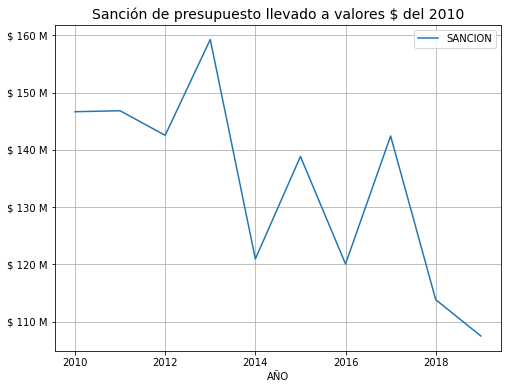

In [234]:
g = presupuestos_llevados_2010.plot(figsize=(8, 6))

ylabels = ['$ {:,.0f}'.format(x) + ' M' for x in g.get_yticks()/1000000];
g.set_yticklabels(ylabels);
plt.title("Sanción de presupuesto llevado a valores $ del 2010", fontsize=14);
plt.grid(True);

**Se puede observar que la inversión real en el área viene bajando año a año con picos en los años impares**

**Esta subida inferimos que viene asociada a años electorales**

### Sanciones por Proyecto, Actividad y Obra.

In [235]:
repr_sancion_by_subset(espacios_verdes, subset='PROYECTO')

SANCION  \
PROYECTO                                                           
VALORIZACION DE LOS ESPACIOS VERDES                 3.580603e+09   
CUIDADO Y PUESTA EN VALOR DE ESPACIOS VERDES        1.333023e+09   
VALORIZACION DE LOS ESPACIOS VERDES DE LA CIUDAD    2.485585e+08   
OBRAS DE ESPACIOS VERDES                            1.697318e+08   
OBRAS DE ESPACIOS VERDES II                         1.025305e+08   
CUIDADO Y PUESTA EN VALOR DE GRANDES PARQUES        4.910000e+07   
CUIDADO Y PRESERVACION DEL ARBOLADO URBANO          1.660000e+07   
A.CU.MAR - VALORIZACION DE LOS ESPACIOS VERDES      1.260797e+07   
OBRAS BA ELIGE EV                                   7.252834e+06   
JARDIN BOTANICO CARLOS THAYS                        4.000000e+06   
CUIDADO Y PUESTA EN VALOR DEL PATRIMONIO CULTUR...  3.500000e+06   
PUESTA EN VALOR EDIFICIOS                           2.000000e+05   

                                                      SANCION_repr  
PROYECTO                                                            
VALORIZACION DE LOS ESPACIOS VERDES                 $3.580.602.639  
CUIDADO Y PUESTA EN VALOR DE ESPACIOS VERDES        $1.333.023.236  
VALORIZACION DE LOS ESPACIOS VERDES DE LA CIUDAD      $248.558.473  
OBRAS DE ESPACIOS VERDES                              $169.731.781  
OBRAS DE ESPACIOS VERDES II                           $102.530.490  
CUIDADO Y PUESTA EN VALOR DE GRANDES PARQUES           $49.100.000  
CUIDADO Y PRESERVACION DEL ARBOLADO URBANO             $16.600.001  
A.CU.MAR - VALORIZACION DE LOS ESPACIOS VERDES         $12.607.967  
OBRAS BA ELIGE EV                                       $7.252.834  
JARDIN BOTANICO CARLOS THAYS                            $4.000.000  
CUIDADO Y PUESTA EN VALOR DEL PATRIMONIO CULTUR...      $3.500.000  
PUESTA EN VALOR EDIFICIOS                                 $200.000

In [236]:
repr_sancion_by_subset(espacios_verdes, subset='ACTIVIDAD')

SANCION  \
ACTIVIDAD                                                          
VALORIZACION DE LOS ESPACIOS VERDES                 1.982056e+09   
PRESERVACION Y PUESTA EN VALOR DE ESPEJOS DE AGUA   1.059893e+09   
ADMINISTRACION Y SERVICIOS GENERALES                5.589359e+08   
MANTENIMIENTO ESPACIOS VERDES LIC 248/2011          3.196141e+08   
VALORIZACION DE LOS ESPACIOS VERDES DE LA CIUDAD    2.388069e+08   
TRABAJOS COMPLEMENTARIOS MANTENIMIENTO ESPACIOS...  1.924693e+08   
GUARDIANES DE PLAZA                                 1.371506e+08   
CONDUCCION                                          1.044502e+08   
PARQUE ESTACION BUENOS AIRES                        1.025305e+08   
OPERATIVOS DE CONTROL Y MANTENIMIENTO DE ESPACI...  9.943601e+07   
JARDIN BOTANICO "CARLOS THAYS"                      9.341689e+07   
MANTENIMIENTO DE FUENTES, MONUMENTOS Y OBRAS DE...  8.181827e+07   
RESERVA ECOLOGICA COSTANERA SUR                     6.974054e+07   
CUIDADO Y PUESTA EN VALOR PATRIMONIO CULTURAL Y...  6.459116e+07   
PARQUE 3 DE FEBRERO                                 5.570386e+07   
CUIDADO Y PUESTA EN VALOR DE GRANDES PARQUES        4.910000e+07   
LICITACION PUBLICA MANTENIMIENTO INTEGRAL DE MU...  4.426000e+07   
MANTENIMIENTO INTEGRAL Y LIMPIEZA DE FUENTES OR...  2.657028e+07   
OBRAS DE ESPACIOS VERDES                            2.634946e+07   
CONTROL Y MANTENIMIENTO DE ESPACIOS VERDES          2.365954e+07   
PARQUE LAS HERAS                                    2.001966e+07   
CUIDADO Y PRESERVACION DEL ARBOLADO URBANO          1.660000e+07   
PARQUE INDOAMERICANO                                1.487974e+07   
PARQUE ISLA DE LA PATERNAL                          1.301278e+07   
A.CU.MAR - VALORIZACION DE LOS ESPACIOS VERDES      1.260797e+07   
ESTUDIOS Y PROYECTOS                                1.227817e+07   
PLAZA CONGRESO                                      1.161140e+07   
RESERVA ECOLOGICA "COSTANERA SUR"                   1.111268e+07   
JARDIN BOTANICO CARLOS THAYS                        8.180350e+06   
PADELAI ETAPA I                                     7.757616e+06   
PARQUE DE VOLEY PLAYA- VELODROMO                    7.252834e+06   
PARQUE CHACABUCO                                    6.506388e+06   
CEMENTERIO RECOLETA CINERARIO Y MURO VERDE          5.000000e+06   
PUESTA EN VALOR DEL EX VELODROMO MUNICIPAL Y EN...  4.053980e+06   
ESTUDIOS, INVESTIGACIONES Y PROYECTOS DE FACTIB...  3.951580e+06   
PARQUE AVELLANEDA                                   3.816185e+06   
PARQUE ALBERDI                                      3.503440e+06   
CUIDADO Y PUESTA EN VALOR DEL PATRIMONIO CULTUR...  3.500000e+06   
2DA ETAPA PM CHACARITA PLAZA NEWBERY Y TRASL. O...  3.000000e+06   
SERVICIOS ESPECIALES                                2.508013e+06   
PLAZA DE MAYO                                       2.302260e+06   
EX ESMA                                             1.301278e+06   
CUIDADO Y PUESTA EN VALOR PARIMONIO CULTURAL Y ...  1.145071e+06   
CIRCUITO AEROBICO ENTORNO GOLF                      8.508350e+05   
TRATAMIENTO ARCOS DORREGO Y ENTORNO                 7.520020e+05   
TRATAMIENTO BAJO PUENTES ALCORTA                    7.520020e+05   
2DA ETAPA SENDEROS JARDIN BOTANICO, INGRESO PLA...  7.520020e+05   
PUERTO ARGENTINO COLON                              7.520020e+05   
TRATAMIENTO CALLE LA PAMPA Y PLAZA RUSIA            7.520020e+05   
TRATAMIENTO ENTORNO VELODROMO SOBRE ALCORTA         7.520020e+05   
REUCN PARQUE URBANO Y RESERVA                       7.520020e+05   
RESERVA ECOLOGICA LAGO LUGANO                       7.520020e+05   
2DA ETAPA PM CHACARITA PLAZAS SOBRE GUZMAN          7.520020e+05   
PUESTA EN VALOR PLAZA EGIPTO                        7.520020e+05   
TERMINACION SECTOR ESPIGON PLUS ULTRA Y ENTORNO     7.520020e+05   
EDIFICIO EX-PADELAI ETAPA 2                         7.520020e+05   
PLAZAS PROVINCIALES 9 DE JULIO                      7.520020e+05   
PLAZA SICILIA RECUPERACION Y PUESTA EN VALOR 

In [237]:
sancion_obras = repr_sancion_by_subset(espacios_verdes, subset='OBRA')

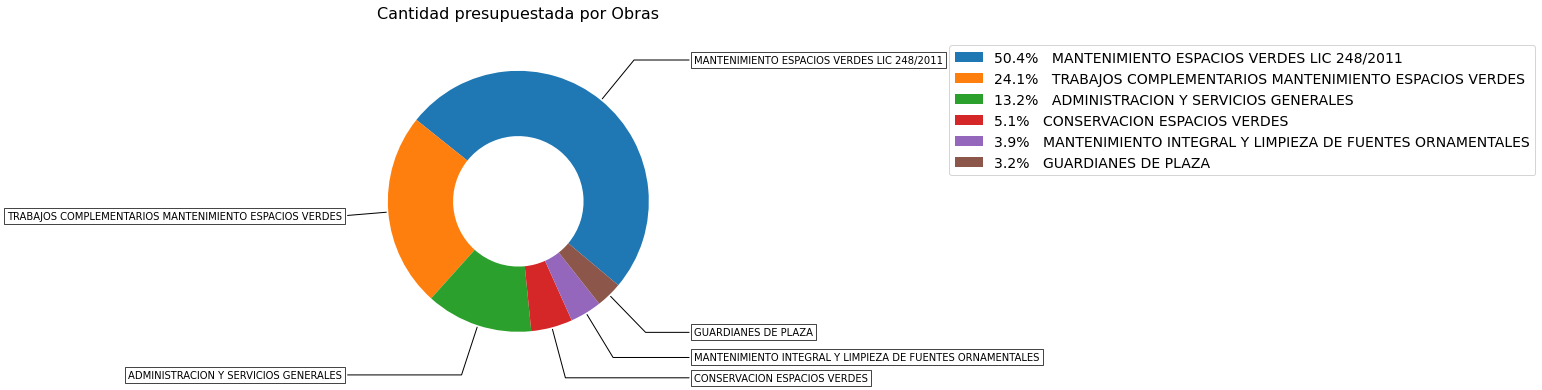

In [238]:
pie_chart(data=sancion_obras['SANCION'].head(6), categorias=sancion_obras.head(6).index, title="Cantidad presupuestada por Obras")

### Sanción por Comuna

In [239]:
sancion_espacios_verdes = repr_sancion_by_subset(espacios_verdes, subset=['AÑO', 'UBICACION_GEOGRAFICA']).reset_index()

In [240]:
sancion_espacios_verdes

AÑO UBICACION_GEOGRAFICA      SANCION  SANCION_repr
0    2019             COMUNA 1  473207692.0  $473.207.692
1    2018             COMUNA 1  416214329.0  $416.214.329
2    2017             COMUNA 1  317506684.0  $317.506.684
3    2016             COMUNA 1  284455961.0  $284.455.961
4    2017            COMUNA 14  234894803.0  $234.894.803
5    2018            COMUNA 14  199629904.0  $199.629.904
6    2019            COMUNA 14  184815781.0  $184.815.781
7    2015             COMUNA 1  155008553.0  $155.008.553
8    2019             COMUNA 4  143107034.0  $143.107.034
9    2016            COMUNA 14  123591476.0  $123.591.476
10   2013             COMUNA 1  106809673.0  $106.809.673
11   2019            COMUNA 13  106052286.0  $106.052.286
12   2011             COMUNA 1  100422622.0  $100.422.622
13   2018            COMUNA 13   95083050.0   $95.083.050
14   2015            COMUNA 14   94621559.0   $94.621.559
15   2019            COMUNA 15   93436001.0   $93.436.001
16   2014             COMUNA 1   82934846.0   $82.934.846
17   2010             COMUNA 1   76868026.0   $76.868.026
18   2019             COMUNA 6   72378735.0   $72.378.735
19   2018            COMUNA 15   68863620.0   $68.863.620
20   2010         A CLASIFICAR   68400000.0   $68.400.000
21   2019             COMUNA 7   68213428.0   $68.213.428
22   2017            COMUNA 15   67839794.0   $67.839.794
23   2019             COMUNA 9   66794573.0   $66.794.573
24   2012             COMUNA 1   63397083.0   $63.397.083
25   2019            COMUNA 12   59492271.0   $59.492.271
26   2017            COMUNA 13   58439089.0   $58.439.089
27   2018            COMUNA 12   47496266.0   $47.496.266
28   2019             COMUNA 2   47223095.0   $47.223.095
29   2019             COMUNA 8   43885886.0   $43.885.886
30   2018             COMUNA 9   42484011.0   $42.484.011
31   2019             COMUNA 3   42376813.0   $42.376.813
32   2018             COMUNA 7   41510062.0   $41.510.062
33   2014            COMUNA 14   41432647.0   $41.432.647
34   2018             COMUNA 6   40180008.0   $40.180.008
35   2017             COMUNA 7   39834514.0   $39.834.514
36   2015            COMUNA 13   39332587.0   $39.332.587
37   2019            COMUNA 10   38849910.0   $38.849.910
38   2017             COMUNA 9   38094114.0   $38.094.114
39   2017            COMUNA 12   38014427.0   $38.014.427
40   2016            COMUNA 15   35750817.0   $35.750.817
41   2013             COMUNA 8   29264293.0   $29.264.293
42   2012             COMUNA 9   29249610.0   $29.249.610
43   2015             COMUNA 7   28834033.0   $28.834.033
44   2016            COMUNA 12   27889099.0   $27.889.099
45   2012             COMUNA 8   27352340.0   $27.352.340
46   2016            COMUNA 13   26513349.0   $26.513.349
47   2014             COMUNA 8   25906800.0   $25.906.800
48   2013            COMUNA 14   25637586.0   $25.637.586
49   2015             COMUNA 4   25009583.0   $25.009.583
50   2016             COMUNA 4   24372650.0   $24.372.650
51   2013             COMUNA 7   23515684.0   $23.515.684
52   2015            COMUNA 12   21740733.0   $21.740.733
53   2013            COMUNA 15   20831082.0   $20.831.082
54   2015             COMUNA 8   20549283.0   $20.549.283
55   2011            COMUNA 14   19527989.0   $19.527.989
56   2017             COMUNA 6   18919833.0   $18.919.833
57   2013             COMUNA 4   18858723.0   $18.858.723
58   2012            COMUNA 14   18606574.0   $18.606.574
59   2013            COMUNA 12   18468298.0   $18.468.298
60   2015             COMUNA 2   17555383.0   $17.555.383
61   2016             COMUNA 7   16640953.0   $16.640.953
62   2014             COMUNA 9   14938300.0   $14.938.300
63   2015            COMUNA 15   14653133.0   $14.653.133
64   2014            COMUNA 15   14588827.0   $14.588.827
65   2015            COMUNA 11   14439283.0   $14.439.283
66   2014             COMUNA 6   14415300.0   $14.415.300
67   2014            COMUNA 13   14358300.0   $14.358.300
68  

In [241]:
fig = px.bar(sancion_espacios_verdes, x="AÑO", y="SANCION", color="UBICACION_GEOGRAFICA",
             title="<b>Sanción por Comuna<b>")
fig = fig.update_layout(
    title={
        'y':0.9,
        'x':0.135,
        'xanchor': 'left',
        'yanchor': 'top'})

fig = fig.update_layout(yaxis_tickformat = '$,.')

fig.show()

**Análisis del gráfico de barras:**

1. **Comuna 1:**  Sigue tendencia creciente
9. **Comuna 9:**  Sigue tendencia creciente
6. **Comuna 6:**  Sigue tendencia creciente
12. **Comuna 12:** Sigue tendencia creciente
13. **Comuna 13:** Sigue tendencia creciente
15. **Comuna 15:** Sigue tendencia creciente




2. **Comuna 2:**  En 2016 hay una caida muy fuerte.
7. **Comuna 7:**  Caida en 2016
8. **Comuna 8:**  Brusca caida 2016 y 2017. Pico fuerte en 2019
10. **Comuna 10:** Brusca caida 2016 y 2017. Pico fuerte en 2019

**Caídas por: "MANTENIMIENTO ESPACIOS VERDES LIC 248/2011; pico en 2019 por "TRABAJOS COMPLEMENTARIOS MANTENIMIENTO ESPACIOS VERDES"**"


3. **Comuna 3:**  Picos de inversión muy fuertes en 2014 y 2019 ->
        2019: "TRABAJOS COMPLEMENTARIOS MANTENIMIENTO ESPACIOS VERDES"; 
        2014: "MANTENIMIENTO ESPACIOS VERDES LIC 248/2011"
        
4. **Comuna 4:**  Pico de inversión muy fuerte en 2019 -> "PARQUE ESTACION BUENOS AIRES y TRABAJOS COMPLEMENTARIOS MANTENIMIENTO ESPACIOS VERDES"


14. **Comuna 14:** Inversión hasta 2017, cae en los últimos años -> Varios paquetes de inversión terminaron de ejecutarse en 2017


5. **Comuna 5:**  Mayor inversión en 2014, cae mucho en 2016. -> LIC 248/2011
11. **Comuna 11:** Inversión hasta 2015 y luego cae bruscamente y queda en niveles bajos.

Comunas 5 y 11  suelen tener muy bajos niveles de inversión. Como en 2013 se aprobó un paquete de inversión para todas las comunas en general esa inversión creció mucho en los dos años posteriores. Pero luego vuelve a sus niveles normales.


#### MANTENIMIENTO ESPACIOS VERDES LIC 248/2011:

2013: : Inversion proporcional por comuna.

2014:  Inversión transversal a todas las comunas.

2015: : Inversion proporcional por comuna.

2016 en adelante: : Se mantiene un nivel de inversión, pero ***para ciertos años algunas comunas no reciben este paquete*** y es el motivo por el cual baja tanto la inversión. Ej comuna 8 en los años 2016 y 2017

# Conclusión Parcial

- **Internamente dentro de la Ciudad no es equitativa la distribución del presupuesto destinado en espacios verdes.**

- **Lo que consideramos principal motivo de la disparidad en m2 de espacios verdes por comunas. Tema que se analizará más adelante.**

- **La ciudad en comparación a los centros urbanos de otros países está muy por debajo de lo recomendado y la tendencia en los presupuestos indica que lo seguirá estando.**

# MERGE

A continuación concatenaremos info de google maps con el datasets de espacios verdes

In [242]:
# Jupyter
url_evt = path_to_datasets + 'google_maps_data.csv'
google_data = pd.read_csv(url_evt)

In [ ]:
# Colab
google_data = pd.read_csv("google_maps_data.csv")

In [243]:
google_data = google_data.dropna(subset=['Nombre'])
google_data = google_data.drop(['Descripcion', 'Direccion', 'CLASE'], axis=1)
google_data = google_data.rename(columns={'Nombre':'nombre'})

In [244]:
google_data.shape

(525, 3)

In [245]:
np.shape(evt)

(1736, 10)

In [246]:
def replace_tildes(series):
    series = series.str.replace("Á", "A")
    series = series.str.replace("É", "E")
    series = series.str.replace("Í", "I")
    series = series.str.replace("Ó", "O")
    series = series.str.replace("Ú", "U")
    
    return series

In [247]:
cols_str = ['nombre', 'clasificac', 'ubicacion', 'barrio']

for col in cols_str:
    evt[col] = evt[col].str.upper()
    evt[col] = replace_tildes(evt[col]) 

In [248]:
evt_score = evt.merge(google_data, left_on='nombre', right_on='nombre', how='inner')

In [249]:
evt_score = evt_score.drop(['patio_de_j', 'ubicacion', 'id_ev_pub'], axis=1)

In [250]:
evt_score = evt_score.dropna(subset=['Reviews'])

In [251]:
evt_score = evt_score.loc[evt_score['Reviews'] > 5]

# Análisis

In [27]:
evt_score.isna().sum()

WKT                   0
nombre                0
nombre_ev             2
clasificac            0
apadrinada           60
observacio          124
fuente_geo            3
fuente_ins            7
decreto             124
fecha_decr          115
ordenanza_           79
fecha_orde           59
boletin_of           43
fecha_bole           43
barrio                1
comuna                0
fech_padri          214
vig_padri           214
alc_conven          215
nom_mapa              1
area                  0
perimeter             0
DGEV_padri          203
mant_2017           203
tareas              203
estado              203
sup_total            42
canil               166
posta_aero          181
etiqueta            228
reja                223
horario_invierno    223
horario_verano      223
obs_reja            230
Score                 1
Reviews               0
dtype: int64

In [28]:
evt_score

WKT  \
0    MULTIPOLYGON (((-58.4371387094279 -34.55314301...   
1    MULTIPOLYGON (((-58.4741362225437 -34.54943439...   
3    MULTIPOLYGON (((-58.4581468288771 -34.61561559...   
4    MULTIPOLYGON (((-58.4085162408924 -34.57602932...   
5    MULTIPOLYGON (((-58.4375850587709 -34.66379111...   
7    MULTIPOLYGON (((-58.4325125306332 -34.66137741...   
10   MULTIPOLYGON (((-58.4808456354283 -34.55202186...   
11   MULTIPOLYGON (((-58.519230915648 -34.620932476...   
12   MULTIPOLYGON (((-58.3940496263873 -34.63561059...   
14   MULTIPOLYGON (((-58.4557731937289 -34.63250949...   
15   MULTIPOLYGON (((-58.4264716319498 -34.65891938...   
16   MULTIPOLYGON (((-58.4924306440303 -34.60558025...   
17   MULTIPOLYGON (((-58.3685236104689 -34.60984883...   
18   MULTIPOLYGON (((-58.4671227085722 -34.64997711...   
19   MULTIPOLYGON (((-58.41085162224 -34.5682601810...   
20   MULTIPOLYGON (((-58.37206228459 -34.5888606289...   
21   MULTIPOLYGON (((-58.4566711914253 -34.65071206...   
23   MULTIPOLYGON (((-58.3983734056976 -34.59846582...   
24   MULTIPOLYGON (((-58.4082637317564 -34.60988449...   
25   MULTIPOLYGON (((-58.4742391114302 -34.59398515...   
26   MULTIPOLYGON (((-58.3914092599896 -34.58446430...   
28   MULTIPOLYGON (((-58.496874587975 -34.635855590...   
29   MULTIPOLYGON (((-58.4527244942854 -34.64504625...   
30   MULTIPOLYGON (((-58.4947475807091 -34.63819250...   
31   MULTIPOLYGON (((-58.407792388749 -34.626474901...   
32   MULTIPOLYGON (((-58.4205477568928 -34.56128182...   
33   MULTIPOLYGON (((-58.3958681948607 -34.58152141...   
34   MULTIPOLYGON (((-58.3892331903216 -34.59327429...   
35   MULTIPOLYGON (((-58.3912831832971 -34.58605835...   
36   MULTIPOLYGON (((-58.3736260234458 -34.59220869...   
37   MULTIPOLYGON (((-58.3951521128112 -34.63008062...   
38   MULTIPOLYGON (((-58.3889209979962 -34.64965579...   
39   MULTIPOLYGON (((-58.3986246533942 -34.58923776...   
40   MULTIPOLYGON (((-58.4556286953182 -34.58771010...   
41   MULTIPOLYGON (((-58.5008931711524 -34.58110959...   
42   MULTIPOLYGON (((-58.4010241503753 -34.58186711...   
43   MULTIPOLYGON (((-58.4485916870202 -34.56143143...   
44   MULTIPOLYGON (((-58.3631261423705 -34.59897349...   
45   MULTIPOLYGON (((-58.4655215588287 -34.60147008...   
46   MULTIPOLYGON (((-58.5087687902799 -34.62564823...   
47   MULTIPOLYGON (((-58.4166230578186 -34.58933190...   
48   MULTIPOLYGON (((-58.4557871438899 -34.56188936...   
50   MULTIPOLYGON (((-58.3902939198519 -34.58459853...   
51   MULTIPOLYGON (((-58.3680909476424 -34.61192157...   
52   MULTIPOLYGON (((-58.3767539202026 -34.63673498...   
53   MULTIPOLYGON (((-58.4618303063455 -34.70502495...   
54   MULTIPOLYGON (((-58.4970463240198 -34.56284264...   
55   MULTIPOLYGON (((-58.4623045587885 -34.69016541...   
56   MULTIPOLYGON (((-58.4492409998454 -34.66601182...   
57   MULTIPOLYGON (((-58.4622785636921 -34.64997737...   
58   MULTIPOLYGON (((-58.4657098965623 -34.68054168...   
59   MULTIPOLYGON (((-58.3838155728555 -34.59697172...   
60   MULTIPOLYGON (((-58.3884109589905 -34.62281234...   
61   MULTIPOLYGON (((-58.4898702561451 -34.63976237...   
62   MULTIPOLYGON (((-58.3985990751653 -34.58530962...   
63   MULTIPOLYGON (((-58.5165791250518 -34.61428708...   
64   MULTIPOLYGON (((-58.5281310065513 -34.62075004...   
65   MULTIPOLYGON (((-58.4229394319315 -34.56390288...   
66   MULTIPOLYGON (((-58.4358218321754 -34.60458838...   
67   MULTIPOLYGON (((-58.4421779825419 -34.63123448...   
68   MULTIPOLYGON (((-58.4063090277191 -34.64029387...   
69   MULTIPOLYGON (((-58.4776103883384 -34.64870037...   
70   MULTIPOLYGON (((-58.4483159115856 -34.59216985...   
71   MULTIPOLYGON (((-58.416844269725 -34.576223981...   
72   MULTIPOLYGON (((-58.5115939724455 -34.59908465...   
73   MULTIPOLYGON (((-58.3816701629211 -34.62725559...   
74   MULTIPOLYGON (((-58.3983695279642 -34.61177466...   
75   MULTIPOLYGON (((-58.3690657081248 -34.62537791...   
76   MULTIPOLYGON (((-58.3843553154536 -34.599570

In [252]:
evt_score['comuna'] = evt_score['comuna'].astype('category')

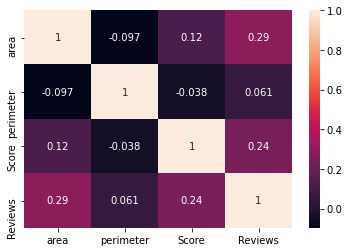

In [253]:
sns.heatmap(evt_score.corr(), annot=True)
plt.show()

***Baja relación lineal entre variables***

Text(0.5, 1.0, 'Reviews vs Area espacios verdes')

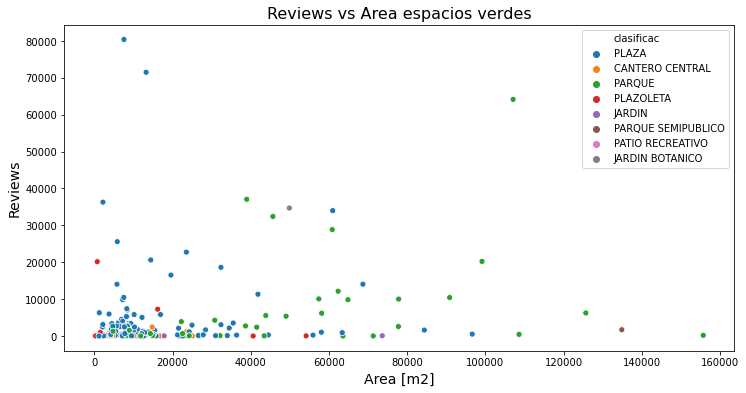

In [259]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score[evt_score['area']<200000], x='area', y='Reviews', hue='clasificac')
plt.ylabel('Reviews', fontsize=14)
plt.xlabel('Area [m2]', fontsize=14)
plt.title("Reviews vs Area espacios verdes", fontsize=16)

**Tanto el área como las reviews tienen valores muy dispersos. No pareciera haber una relación entre features**

Como primera impresión uno supondría que cuanto mayor el área del espacio verde más propenso a recibir comentarios de las personas.

Una de las suposiciones para explicar esto es que los nombres de áreas verdes no coinciden con el conocimiento general del público. Por lo tanto hay sesgo en el rankeo de google maps.

### Otra medida de espacio a evaluar es el perímetro

In [265]:
evt_score.loc[(evt_score['area']>25000)&(evt_score['perimeter']>8000)]

WKT  \
77   MULTIPOLYGON (((-58.375369313667 -34.595794821...   
103  MULTIPOLYGON (((-58.4563481819296 -34.52698361...   
138  MULTIPOLYGON (((-58.5027617202044 -34.65766890...   
176  MULTIPOLYGON (((-58.4210686188851 -34.56506331...   
245  MULTIPOLYGON (((-58.4160324282608 -34.57265439...   

                         nombre clasificac     barrio comuna        area  \
77             PLAZA SAN MARTIN      PLAZA     RETIRO      1   32368.014   
103         PARQUE DE LOS NIÑOS     PARQUE      NUÑEZ     13  375443.738   
138         DR. JUAN B. ALBERDI     PARQUE  MATADEROS      9   63569.886   
176              PLAZA PAKISTAN      PLAZA    PALERMO     14   30992.334   
245  EL ROSEDAL (PLAZA HOLANDA)      PLAZA    PALERMO     14   60954.836   

     perimeter  Score  Reviews  
77    9000.000    4.3   3056.0  
103  15917.933    4.5  27822.0  
138   9000.000    4.4      8.0  
176   9000.000    4.2     90.0  
245  12464.173    4.7  34003.0

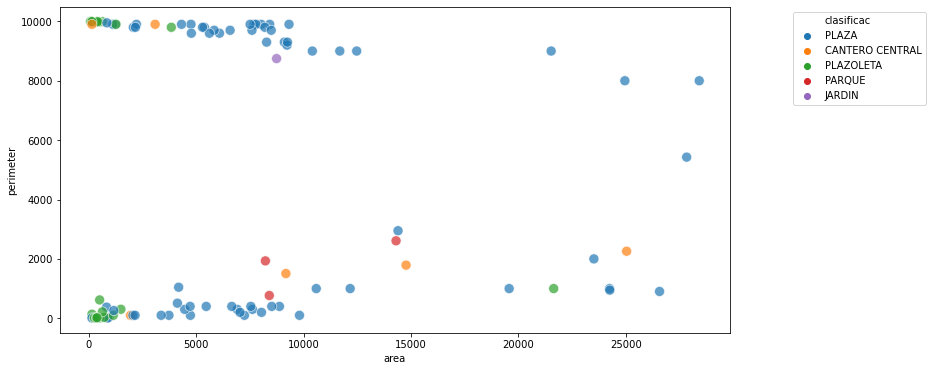

In [263]:
# Chequeamos si el perímetro se corresponde con el área.
plt.figure(figsize=(12, 6))
aux = evt_score.loc[(evt_score['perimeter']!=0)&(evt_score['area']<30000)]
sns.scatterplot(data=aux, x='area', y='perimeter', hue='clasificac', s=100, alpha=0.7)
plt.legend(bbox_to_anchor=(1.3, 1));

### Tenemos cuatro tipos de espacios verdes por regla general: 
 1. Poca área y poco perímetro: Pequeños espacios verdes:   Plazoletas, plazas y canteros
 2. Poca área y mucho perímetro: Espacios verdes muy alargados: Plazoletas, plazas y canteros
 3. Area y perímetro proporcionales: Formas extrañas y generalmente alargadas.
 4. Mucho área y poco perímetro: Espacios verdes grandes con formas bien distribuídas (cuadrados, círculos, etc) 
 
 **Ya que espacios verdes los hay de todas formas y tamaños no consideramos que el perímetro sea una buena feature para analizar**

### Lo siguiente es buscar relaciones entre reviews y score con la clasificación de espacio verde y comuna

In [267]:
evt_score = evt_score[evt_score['clasificac']!='PATIO RECREATIVO']  # no aporta

Text(0.5, 1.0, 'Distribución de reviews por clasificación EV')

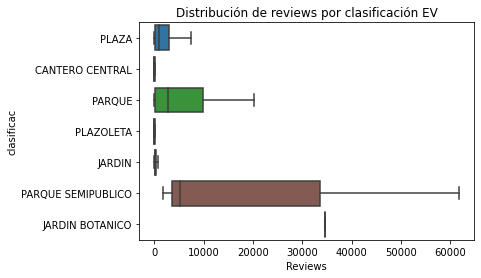

In [268]:
# Distribución de reviews por clasificación:
sns.boxplot(data=evt_score, x='Reviews', y='clasificac', showfliers=False)
plt.title("Distribución de reviews por clasificación EV")

Text(0.5, 1.0, 'Distribución de reviews por clasificación EV')

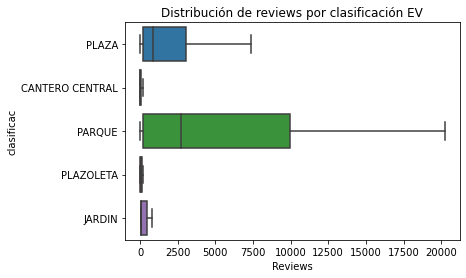

In [270]:
aux_evt = evt_score.loc[(evt_score['clasificac']!='PARQUE SEMIPUBLICO')&(evt_score['clasificac']!='JARDIN BOTANICO')]
# Distribución de reviews por clasificación sin parque semipublico ni jardín botánico:
sns.boxplot(data=aux_evt, x='Reviews', y='clasificac', showfliers=False)
plt.title("Distribución de reviews por clasificación EV")

**Parques tienen muchas reviews en general. Seguido por las plazas. Luego los otros tipos de clasificación de espacios verdes que considera el gobierno de la ciudad no tienen presencia en google maps**

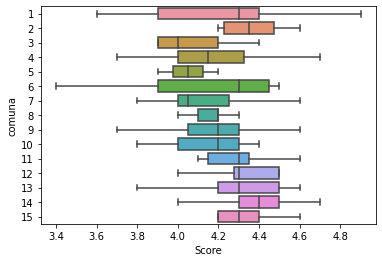

In [271]:
# Distribución del Score por comuna
sns.boxplot(data=evt_score, x='Score', y='comuna', showfliers=False)

**La opinión del público en general de los espacios verdes es positiva. No hay scores menores a 3 puntos**

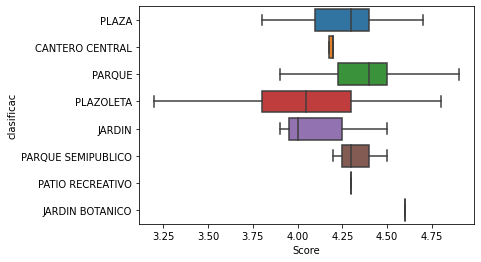

In [39]:
# Distribución del Score por clasificación
sns.boxplot(data=evt_score, x='Score', y='clasificac', showfliers=False)

**Los parques tienen una ligera ventaja en cuanto a score con respecto a las plazas**

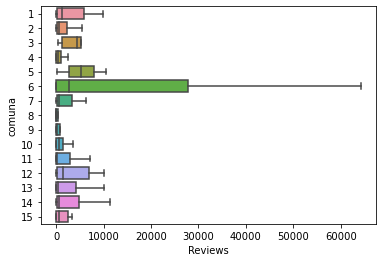

In [272]:
# Distribución de Reviews por comuna
sns.boxplot(data=evt_score, x='Reviews', y='comuna', showfliers=False)

**Parece ser que la comuna 6 tiene un espacio verde que se lleva muchísmicas reviews.**

In [273]:
evt_score.loc[(evt_score['comuna']==6)&(evt_score['Reviews']>60000)]

WKT             nombre  \
66  MULTIPOLYGON (((-58.4358218321754 -34.60458838...  PARQUE CENTENARIO   

   clasificac     barrio comuna        area  perimeter  Score  Reviews  
66     PARQUE  CABALLITO      6  107087.524        0.0    4.5  64161.0

**Se trata del Parque Centenario**

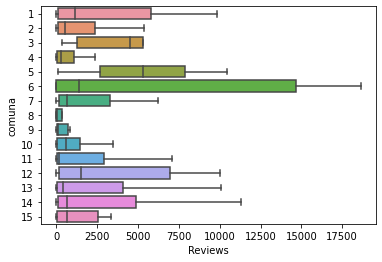

In [274]:
# Filtramos este outlier para comparar:
aux = evt_score[evt_score['nombre']!='PARQUE CENTENARIO']
# Distribución de Reviews por comuna
sns.boxplot(data=aux, x='Reviews', y='comuna', showfliers=False)

**Aún así la comuna 6 tiene otros espacios verdes con buen ranking de reviews. Otra comuna que resalta es la comuna 5. Haciendo memoria esta comuna es la que menor cantidad de espacios verdes tiene, así que es normal que una zona con alta densidad de población con pocos espacios verdes sean muy comentados**

### Observamos que área y reviews tenían mucha dispersión, por lo tanto aplicamos transformaciones logarítmicas para analizar si se podía observar alguna relación entre las features.

Text(0.5, 1.0, 'Log reviews vs Log area')

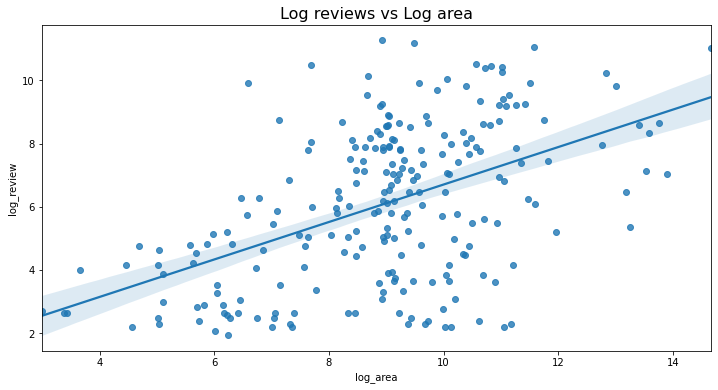

In [276]:
plt.figure(figsize=(12, 6))
evt_score['log_area'] = np.log1p(evt_score['area'])
evt_score['log_review'] = np.log1p(evt_score['Reviews'])
sns.regplot(data=evt_score, x='log_area', y='log_review')
plt.title("Log reviews vs Log area", fontsize=16)

### A simple vista pareciera haber una relación lineal entre las variables

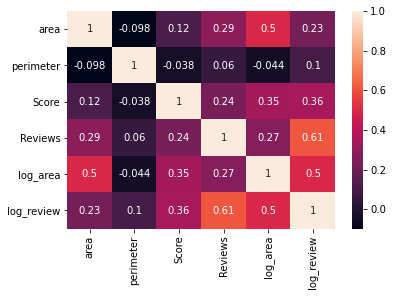

In [277]:
sns.heatmap(evt_score.corr(), annot=True)
plt.show()

### La correlación lineal de pearson entre ambas es de 0.5. No indicaría una linealidad.

**Pasamos a analizar el gráfico según la categoría de espacio verde**

Text(0.5, 1.0, 'Log reviews vs Log area')

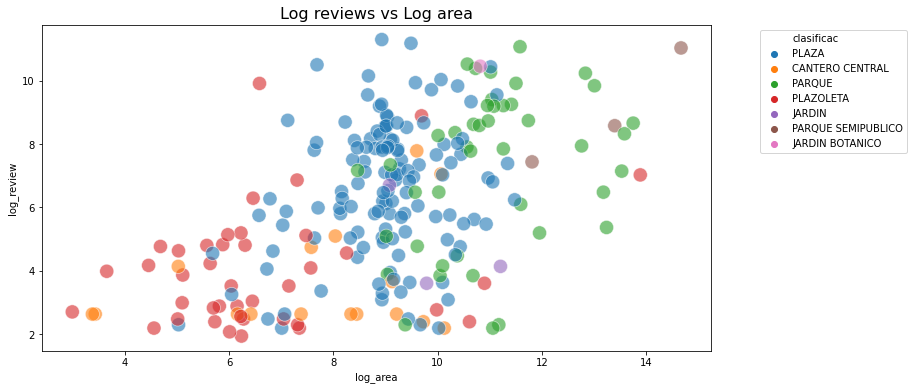

In [279]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score, x='log_area', y='log_review', hue='clasificac', s=200, alpha=0.6)
plt.legend(bbox_to_anchor=(1.3, 1));
plt.title("Log reviews vs Log area", fontsize=16)

**Se puede observar que lo que al principio parecía estar relacionado linealmente al desagregar por clasificación deja de tener sentido**

Lo que si se puede obtener de este gráfico es que en general los parques son mejor rankeados por el público que las plazas y las plazas de las plazoletas. 

### Seguimos analizando relaciones entre variables:

Text(0.5, 1.0, 'Score vs Reviews')

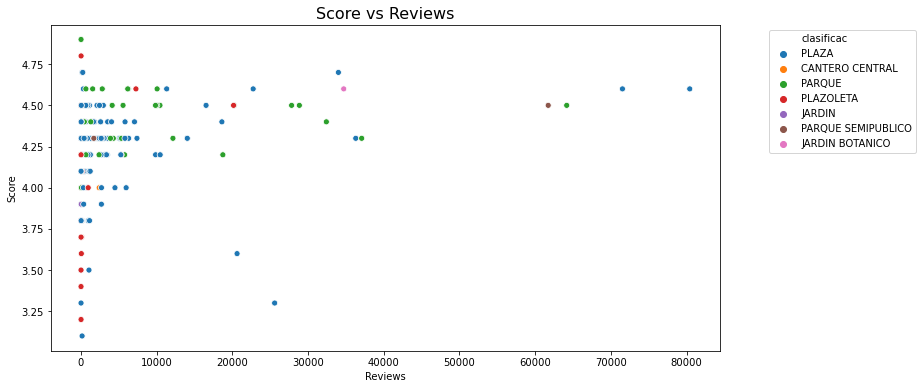

In [285]:
# ¿Hay relación entre el score y el número de reviews?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score[evt_score['Score'] > 2.5], x='Reviews', y='Score', hue='clasificac')
plt.legend(bbox_to_anchor=(1.3, 1));
plt.title("Score vs Reviews", fontsize=16)

**A pocas reviews los scores varían mucho. Ya luego para espacios verdes muy comentados los scores suelen ser muy buenos**

Text(0.5, 1.0, 'Score vs Log area')

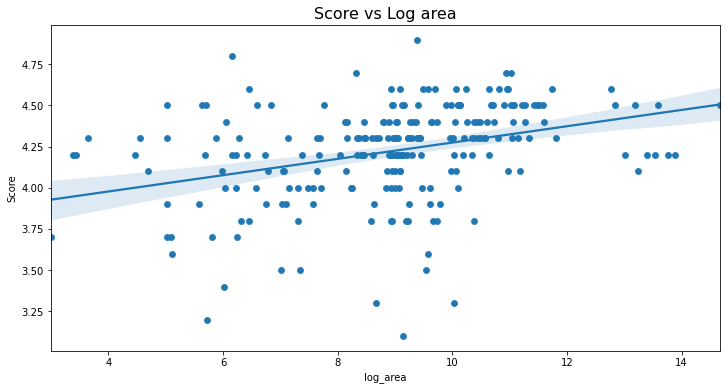

In [286]:
# ¿Hay relación entre el score y el área?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=evt_score[evt_score['Score'] > 2.5], x='log_area', y='Score')
sns.regplot(data=evt_score[evt_score['Score'] > 2.5], x='log_area', y='Score')
plt.title("Score vs Log area", fontsize=16)

**Usamos log area por la dispersión de la misma. No pareciera haber una relación entre las variables**

In [288]:
px.scatter(data_frame=evt_score, x='log_area', y='log_review',
           color='comuna', template='presentation', title='Plot interactivo - Log Review vs Los Area por comuna')

# Modelado.

Si bien en el análisis previo quedó claro que no hay una relación clara entre las variables, aplicaremos algunas técnicas de regresión.

In [289]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [290]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

**Tomamos como supuesto que la cantidad de reviews está directamente relacionada con la frecuencia de visitantes que tiene cada espacio verde.**

In [291]:
X = evt_score[['log_area']]
y = evt_score['log_review']

In [292]:
evt_score.shape

(234, 11)

In [293]:
np.arange(0, 0.4, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39])

# Utilizaremos la métrica R2_score para hacer las comparaciones

# Linear

Text(0.5, 1.0, 'R2 score')

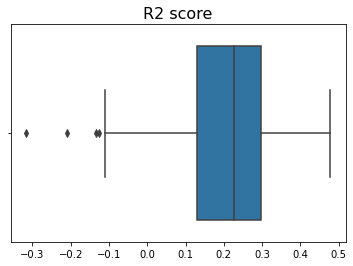

In [297]:
# Repetimos 
a = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    lr = LinearRegression()

    # y: Reviews
    lr.fit(x_train, y_train)
    ypred = lr.predict(x_test)
    a.append(lr.score(x_test, y_test))
sns.boxplot(a)
plt.title("R2 score", fontsize=16)

### R2_score = 0.21

In [300]:
lr.score(x_test, y_test)

0.26119843058660963

In [301]:
ypred_pred = lr.predict(x_test)

Text(0.5, 0, 'True Values')

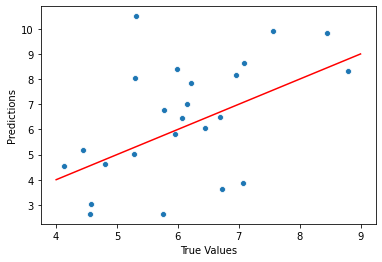

In [306]:
sns.scatterplot(ypred, y_test)
plt.plot(np.arange(4,10),np.arange(4,10), 'r')
plt.ylabel('Predictions')
plt.xlabel('True Values')

### No se consigue una buena predicción

# SVR

In [307]:
from sklearn.svm import SVR

In [308]:
# Ahora cambiamos el estimador, usaremos SVR
n_folds=5
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="r2",
                  verbose=True, n_jobs=3)

In [309]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
gs.fit(x_train, y_train)
gs.best_score_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  49 tasks      | elapsed:   35.3s
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed:   48.7s finished


0.2442914340107019

### R2_score = 0.244

Text(0.5, 0, 'True Values')

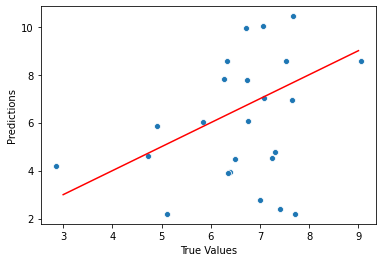

In [312]:
ypred = gs.predict(x_test)
sns.scatterplot(ypred, y_test)
plt.plot(np.arange(3,10),np.arange(3,10), 'r')
plt.ylabel('Predictions')
plt.xlabel('True Values')

### Nuevamente la predicción es muy mala

# Ridge

In [317]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)

est = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [0.0005, 0.001,0.005]
# Juntamos el diccionario de parametros
parameters = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="r2")

gs.fit(x_train, y_train)
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

{'alpha': 0.0005} 

0.2138226974782195 



### R2_score = 0.213

Text(0.5, 0, 'True Values')

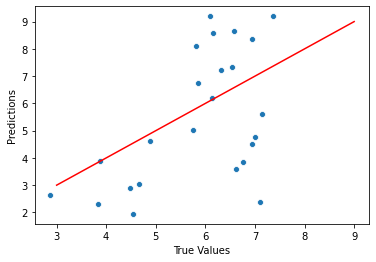

In [319]:
ypred = gs.predict(x_test)
ypred = gs.predict(x_test)
sns.scatterplot(ypred, y_test)
plt.plot(np.arange(3,10),np.arange(3,10), 'r')
plt.ylabel('Predictions')
plt.xlabel('True Values')

### Los métodos lineales no tienen oportunidad de predecir correctamente

# Polynomical features

Veremos si una regresión polinómica tiene mejor efecto

In [320]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

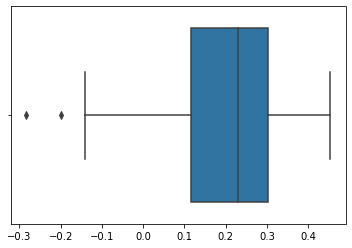

In [321]:
a = []
b = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    degree=3
    polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(x_train, y_train)
    a.append(polyreg.score(x_test, y_test))
    
    b.append(mean_squared_error(y_test, polyreg.predict(x_test)))
sns.boxplot(a)

### R2_score = 0.22

No mejoró

R2_Score: 0.25


Text(0.5, 0, 'True Values')

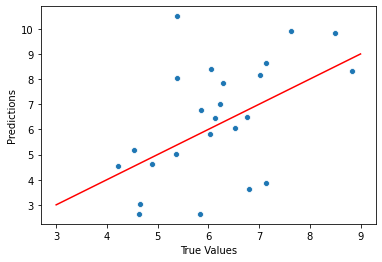

In [324]:
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(x_train, y_train)
print(f'R2_Score: {polyreg.score(x_test, y_test):.2f}')

ypred = gs.predict(x_test)
sns.scatterplot(ypred, y_test)
plt.plot(np.arange(3,10),np.arange(3,10), 'r')
plt.ylabel('Predictions')
plt.xlabel('True Values')

**Sigue siendo una mala predicción**

# KNN regressor

In [325]:
from sklearn.neighbors import KNeighborsRegressor

In [326]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

neigh = KNeighborsRegressor()

#Use GridSearch
gs = GridSearchCV(neigh, param_grid=hyperparameters,refit=True, cv=10, scoring="r2")

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             scoring='r2')

In [329]:
gs.best_params_

{'leaf_size': 1, 'n_neighbors': 24, 'p': 1}

In [330]:
print(f'R2_Score: {gs.score(x_test, y_test):.2f}')

R2_Score: 0.17


### R2_score = 0.17

Text(0.5, 0, 'True Values')

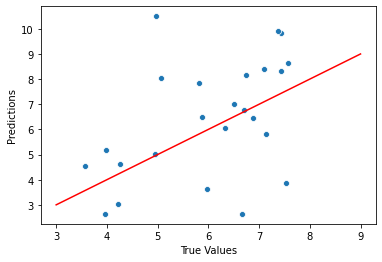

In [331]:
ypred = gs.predict(x_test)
sns.scatterplot(ypred, y_test)
plt.plot(np.arange(3,10),np.arange(3,10), 'r')
plt.ylabel('Predictions')
plt.xlabel('True Values')

### Ninguno de los métodos utilizados logra el objetivo. 

# Merge geopandas

## Se prosiguio a mergear la informacion de google maps con los espacios verdes para visualizarlos en el mapa y poder sacar alguna conclusion o analisis parcial


In [ ]:
for col in cols_str:
    ev[col] = ev[col].str.upper()
    ev[col] = replace_tildes(ev[col]) 

In [ ]:
evr = ev.merge(google_data, left_on="nombre", right_on="nombre", how='left')
evr.head()

In [ ]:
evr.info()

In [ ]:
evr = evr.sort_values('Reviews', ascending = False)
evr.head(3)

In [ ]:
evr["comuna"] = evr["comuna"].astype("float")
evr["comuna"] = evr["comuna"].astype("int")
evr["comuna"] = evr["comuna"].astype("str")
evr.head(2)

In [ ]:
evr["Score"].fillna(0, inplace=True)
evr["Reviews"].fillna(0, inplace=True)

In [ ]:
sns.pairplot(evr, hue = "clasificac")

In [ ]:
gplt.choropleth(evr, hue = evr['Reviews'], cmap = 'OrRd', figsize = (22,17), legend = True)

In [ ]:
clasif = evr.dissolve(by = "area", aggfunc='sum')
clasif.plot(column = 'Reviews', legend=True, figsize = (22,17))

In [ ]:
clasif = evr.dissolve(by = "area", aggfunc='sum')
clasif.plot(column = 'Reviews',cmap = 'OrRd', legend=True, figsize = (22,17))

In [ ]:
evr1 = evr[evr["comuna"] == "1"]
evr1.head()

In [ ]:
gplt.choropleth(evr1, hue = evr['Reviews'], cmap = 'winter', figsize = (20,15), legend = True)

In [ ]:
com1 = com[com["comuna"] == "1"]
com1

In [ ]:
gplt.choropleth(com1, hue = "areac",  figsize = (20,15), legend = True, alpha = 0.04)

In [ ]:
gplt.choropleth(com1, hue = "areac", legend = True, alpha = 0.04)
clasif = evr1.dissolve(by = "area", aggfunc='sum')
clasif.plot(com1)

In [ ]:
# Ahora mergeo con el de comuna para unificar la info

In [ ]:
evr["area"] = evr["area"].astype("str")
evr["area"] = evr["area"].astype("float")

In [ ]:
evr = evr.drop(evr[evr['Score'] == 0].index)

In [ ]:
resumen_comuna = evr.groupby(["comuna"]).agg({"perimeter":"count", "area":"sum", "Score":"median", "Reviews":"median"})
resumen_comuna.reset_index()
resumen_comuna.head()

In [ ]:
resumen_comuna["comuna"] = resumen_comuna["comuna"].astype("str")
resumen_comuna.head()

In [ ]:
sns.pairplot(resumen_comuna)

In [ ]:
sns.heatmap(resumen_comuna.corr(), annot=True)
plt.show()

In [ ]:
comunas = com.merge(resumen_comuna, left_on = "comuna", right_on = "comuna", how = "left")
comunas.head()

# Merge con Población

In [233]:
poblacion = pd.read_excel("Estimacion_Poblacion_nuevo.xlsx")
poblacion.head()

Grupo de edad (años)    Total       1      2      3       4      5      6  \
0                Total  1426582  123030  66915  90417  113113  85451  83865   
1                  0-4   108023    8902   3819   6405   10301   5797   5806   
2                  5-9   105680    7939   3568   6198   10183   5868   5545   
3                10-14    99209    7592   3347   5858   10054   5384   4955   
4                15-19    94542    7654   4005   5626    8996   5262   4770   

        7       8      9     10     11     12      13      14     15    SEXO  \
0  112134  106508  81816  79581  89555  99162  107341  102439  85255  Hombre   
1    9568   11768   6465   5743   6041   7305    7635    6518   5950  Hombre   
2    9274   11335   6865   6192   6603   7002    6956    5957   6195  Hombre   
3    8764   10616   6658   5488   6390   6402    6446    5523   5732  Hombre   
4    8086    9369   5845   5426   5779   6079    6237    5819   5589  Hombre   

    AÑO  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015

In [235]:
poblacion.columns

col_nulls = poblacion.isnull().any()
col_nulls

poblacion.rename(columns={'Grupo de edad (años)':'Rango Etario',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',},inplace=True) 

poblacion.columns

poblacion.head()

poblacion.set_index('Rango Etario')

index_pobl=poblacion[poblacion ['Rango Etario'] == 'Total'].index

poblacion.drop(index_pobl , inplace=True)

poblacion.head()



pobl_año= poblacion.groupby("AÑO").sum()

pobl_2020 = poblacion.loc[poblacion.AÑO == 2020]

pobl_2020_sexo= pobl_2020.groupby("SEXO").sum()

pobl_2020_tr = pobl_2020.transpose()
tr_com=pobl_2020_tr.head(17)
tr_com

tr_com1=tr_com.drop(['Rango Etario','Total'])
tr_com1

tr_com1["sum"] = tr_com1.sum(axis=1)
tr_com1



181    182    183   184    185    186    187    188   189   190   191  \
1    8886   8022   8023  8121  10182  11163  11068  10202  9710  8594  7140   
2    3660   3462   3396  4079   5946   6041   5259   4586  4287  4087  3506   
3    6213   6087   6016  5802   6790   7434   7774   7272  7130  6182  4798   
4   10058  10066  10394  9338   7960   7926   8258   8392  8564  7103  5664   
5    5612   5751   5518  5415   5537   6544   7361   6945  6714  5936  4916   
6    5614   5428   5073  4902   4795   5755   6953   7030  6527  6002  5100   
7    9325   9150   9043  8377   7587   7724   8220   8472  8163  7323  5985   
8   11680  11389  11153  9885   8197   7777   7548   7557  7530  6189  4623   
9    6266   6736   6831  6022   5020   5078   5728   6135  6303  5466  4520   
10   5523   6028   5587  5546   4735   4998   5691   5943  5874  5689  4819   
11   5784   6400   6476  5881   5123   5664   6537   6891  6868  6498  5479   
12   7073   6863   6562  6257   5628   6520   8300   8245  7706  7148  5855   
13   7343   6773   6564  6376   6170   7204   8675   8943  8435  7586  6048   
14   6271   5803   5625  5952   7277   8277   8819   8144  7932  6931  5619   
15   5707   6015   5820  5698   5298   5978   7110   6813  6559  6115  4746   

     192   193   194   195   196   197    199    200    201   202   203  \
1   6203  5662  4820  3772  2624  3459   7975   7389   7362  7493  9273   
2   3521  3708  3482  2829  2059  2799   3278   3215   3176  4470  7131   
3   4537  3977  3437  2893  2162  2806   5588   5490   5505  5562  6808   
4   5136  4373  3692  3200  2349  2484   9403   9690   9870  9106  7726   
5   4371  4094  3520  2973  2255  2850   5271   5253   5252  5176  5558   
6   4703  4440  3812  3107  2428  3121   5410   5288   4868  4788  4949   
7   5396  5014  4324  3668  2757  3395   8640   8771   8691  8009  7575   
8   3843  3318  2905  2531  1837  1691  11387  11126  10931  9968  8376   
9   4094  3875  3294  2831  2162  2495   5867   6156   6076  5700  4676   
10  4306  4098  3324  2965  2237  2702   5311   5563   5729  5195  4712   
11  4757  4524  3985  3213  2508  3168   5527   6124   5857  5567  4747   
12  5142  4982  4402  3612  2720  3377   6833   6666   6284  5901  5428   
13  5533  5632  5054  4257  3103  4295   6790   6391   6081  6012  6451   
14  5398  5246  4851  3988  2817  3834   6179   5561   5481  6299  8234   
15  4392  4077  3364  2866  2188  2652   5533   5544   5691  5282  5199   

      204   205   206   207   208   209   210   211   212   213   214   215  \
1   10474  9864  9515  9156  8310  6922  6516  6379  5851  5079  4172  7024   
2    6946  5924  5028  5014  4940  4512  4722  5044  4826  4419  3400  6678   
3    7404  7568  7503  7228  6753  5602  5433  5476  5125  4626  3910  6385   
4    7979  8900  8739  8796  7878  6453  5825  5493  5153  4609  3779  5744   
5    6932  7891  7681  7243  6681  5814  5683  5676  5330  4793  3929  7043   
6    6274  7696  7713  7263  6791  6086  5774  5887  5381  5012  4060  7426   
7    7875  8799  8686  8901  8194  7063  6460  6337  5830  5409  4673  8025   
8    7715  7956  8051  7987  6865  5094  4542  4503  4122  3806  3027  3844   
9    4957  5645  6118  6284  5804  4744  4515  4446  4356  4062  3595  5407   
10   5038  5941  6259  6427  6242  5371  5085  4839  4525  4345  3781  6164   
11   5502  6718  7127  7450  6937  5940  5723  5640  5198  4873  4216  7174   
12   6923  8925  8837  8185  7754  6679  6187  6356  5856  5433  4650  7488   
13   8198  9913  9962  9339  8491  7416  7307  7683  7297  6321  5412  9303   
14   9429  9774  9104  8829  8020  6934  6993  7256  6858  6138  4982  8260   
15   6224  7460  7192  7144  6797  5579  5246  5230  4761  4382  3709  6094   

         sum  
1   256405.0  
2   149430.0  
3   193276.0  
4   240100.0  
5   187518.0  
6   185456.0  
7   241861.0  
8   228953.0  
9   171264.0  
10  170592.0  
11  190076.0  
12  214777.0  
13  236358.0  
14  227115.0  
15  182465.0

In [243]:
habxcom = tr_com1.copy()
habxcom.index.name = "comuna"
habxcom = habxcom[["sum"]]
habxcom.columns = ["habitantes"]
habxcom.reset_index()


comuna  habitantes
0       1    256405.0
1       2    149430.0
2       3    193276.0
3       4    240100.0
4       5    187518.0
5       6    185456.0
6       7    241861.0
7       8    228953.0
8       9    171264.0
9      10    170592.0
10     11    190076.0
11     12    214777.0
12     13    236358.0
13     14    227115.0
14     15    182465.0

In [263]:
comunas = com.merge(resumen_comuna, left_on = "comuna", right_on = "comuna", how = "left")
comunas.head()

wkt  \
0  MULTIPOLYGON (((-58.3800038855693 -34.57002352...   
1  MULTIPOLYGON (((-58.4128700313089 -34.61411625...   
2  MULTIPOLYGON (((-58.4306058283309 -34.60704708...   
3  MULTIPOLYGON (((-58.4519952454565 -34.62974544...   
4  MULTIPOLYGON (((-58.5192540532325 -34.63301009...   

                                   barrios      perimetro              areac  \
0                                 RECOLETA  21452.8386478  6317264.560990001   
1                          ALMAGRO - BOEDO  12323.4324792  6660603.119369999   
2                                CABALLITO  10990.9644715  6851028.913569999   
3                FLORES - PARQUE CHACABUCO  17972.2578696      12422900.8308   
4  LINIERS - MATADEROS - PARQUE AVELLANEDA   21411.738344      16505305.7861   

  comuna id          objeto  \
0      2  1  LIMITE COMUNAL   
1      5  2  LIMITE COMUNAL   
2      6  3  LIMITE COMUNAL   
3      7  4  LIMITE COMUNAL   
4      9  5  LIMITE COMUNAL   

                                            geometry  perimeter        area  \
0  MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...         20  267862.933   
1  MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...          3    7983.412   
2  MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...          8  192722.381   
3  MULTIPOLYGON (((-58.45200 -34.62975, -58.45158...         12  252974.291   
4  MULTIPOLYGON (((-58.51925 -34.63301, -58.51908...         11  463692.482   

   Score  Reviews  
0   4.30    492.0  
1   4.20    399.0  
2   4.35   1405.5  
3   4.05    255.5  
4   4.20    117.0

In [264]:
comunas = comunas.merge(habxcom, left_on = "comuna", right_on = "comuna", how = "left")
comunas.head()

wkt  \
0  MULTIPOLYGON (((-58.3800038855693 -34.57002352...   
1  MULTIPOLYGON (((-58.4128700313089 -34.61411625...   
2  MULTIPOLYGON (((-58.4306058283309 -34.60704708...   
3  MULTIPOLYGON (((-58.4519952454565 -34.62974544...   
4  MULTIPOLYGON (((-58.5192540532325 -34.63301009...   

                                   barrios      perimetro              areac  \
0                                 RECOLETA  21452.8386478  6317264.560990001   
1                          ALMAGRO - BOEDO  12323.4324792  6660603.119369999   
2                                CABALLITO  10990.9644715  6851028.913569999   
3                FLORES - PARQUE CHACABUCO  17972.2578696      12422900.8308   
4  LINIERS - MATADEROS - PARQUE AVELLANEDA   21411.738344      16505305.7861   

  comuna id          objeto  \
0      2  1  LIMITE COMUNAL   
1      5  2  LIMITE COMUNAL   
2      6  3  LIMITE COMUNAL   
3      7  4  LIMITE COMUNAL   
4      9  5  LIMITE COMUNAL   

                                            geometry  perimeter        area  \
0  MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...         20  267862.933   
1  MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...          3    7983.412   
2  MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...          8  192722.381   
3  MULTIPOLYGON (((-58.45200 -34.62975, -58.45158...         12  252974.291   
4  MULTIPOLYGON (((-58.51925 -34.63301, -58.51908...         11  463692.482   

   Score  Reviews  habitantes  
0   4.30    492.0    149430.0  
1   4.20    399.0    187518.0  
2   4.35   1405.5    185456.0  
3   4.05    255.5    241861.0  
4   4.20    117.0    171264.0

In [265]:
comunas["areac"] = comunas["areac"].astype("float")

In [274]:
comunas["%verde"] = comunas["area"]/comunas["areac"]*100
comunas["denspob_xm2"] = comunas["habitantes"]/comunas["areac"]
comunas["m2xh"] = comunas["area"]/comunas["habitantes"]
comunas = comunas.drop(["perimeter"], axis = 1)
comunas.head(15)

wkt  \
0   MULTIPOLYGON (((-58.3800038855693 -34.57002352...   
1   MULTIPOLYGON (((-58.4128700313089 -34.61411625...   
2   MULTIPOLYGON (((-58.4306058283309 -34.60704708...   
3   MULTIPOLYGON (((-58.4519952454565 -34.62974544...   
4   MULTIPOLYGON (((-58.5192540532325 -34.63301009...   
5   MULTIPOLYGON (((-58.4883373673246 -34.62016035...   
6   MULTIPOLYGON (((-58.4983848398831 -34.59636765...   
7   MULTIPOLYGON (((-58.5033113250844 -34.59385615...   
8   MULTIPOLYGON (((-58.4267593172764 -34.55202337...   
9   MULTIPOLYGON (((-58.4119188098038 -34.59800307...   
10  MULTIPOLYGON (((-58.4260240564076 -34.59661406...   
11  MULTIPOLYGON (((-58.4491320831847 -34.65116577...   
12  MULTIPOLYGON (((-58.3990770799739 -34.66091748...   
13  MULTIPOLYGON (((-58.3685405568825 -34.57365006...   
14  MULTIPOLYGON (((-58.4403311131044 -34.54022434...   

                                              barrios      perimetro  \
0                                            RECOLETA  21452.8386478   
1                                     ALMAGRO - BOEDO  12323.4324792   
2                                           CABALLITO  10990.9644715   
3                           FLORES - PARQUE CHACABUCO  17972.2578696   
4             LINIERS - MATADEROS - PARQUE AVELLANEDA   21411.738344   
5   FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...  18332.0374567   
6   VILLA DEL PARQUE - VILLA  DEVOTO - VILLA GRAL....   19987.696155   
7   COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...   17232.189372   
8                                             PALERMO  22126.5318584   
9                           BALVANERA - SAN CRISTOBAL  10486.2608092   
10  AGRONOMIA - CHACARITA -  PARQUE CHAS -  PATERN...  17832.5855796   
11     VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI  20935.0125125   
12  BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...  35423.2827986   
13  CONSTITUCION - MONSERRAT - PUERTO MADERO -  RE...  36102.2015728   
14                      BELGRANO - COLEGIALES - NUÑEZ  26198.8269533   

           areac comuna  id          objeto  \
0   6.317265e+06      2   1  LIMITE COMUNAL   
1   6.660603e+06      5   2  LIMITE COMUNAL   
2   6.851029e+06      6   3  LIMITE COMUNAL   
3   1.242290e+07      7   4  LIMITE COMUNAL   
4   1.650531e+07      9   5  LIMITE COMUNAL   
5   1.265656e+07     10   6  LIMITE COMUNAL   
6   1.412004e+07     11   7  LIMITE COMUNAL   
7   1.557093e+07     12   8  LIMITE COMUNAL   
8   1.584587e+07     14   9  LIMITE COMUNAL   
9   6.385991e+06      3  10  LIMITE COMUNAL   
10  1.432290e+07     15  11  LIMITE COMUNAL   
11  2.221690e+07      8  12  LIMITE COMUNAL   
12  2.168464e+07      4  13  LIMITE COMUNAL   
13  1.779457e+07      1  14  LIMITE COMUNAL   
14  1.471321e+07     13  15  LIMITE COMUNAL   

                                             geometry         area  Score  \
0   MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...   267862.933   4.30   
1   MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...     7983.412   4.20   
2   MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...   192722.381   4.35   
3   MULTIPOLYGON (((-58.45200 -34.62975, -58.45158...   252974.291   4.05   
4   MULTIPOLYGON (((-58.51925 -34.63301, -58.51908...   463692.482   4.20   
5   MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...  1140917.096   4.20   
6   MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...    61764.471   4.25   
7   MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...   842478.001   4.30   
8   MULTIPOLYGON (((-58.42676 -34.55202, -58.42676...  2100302.639   4.40   
9   MULTIPOLYGON (((-58.41192 -34.59800, -58.41029...    27001.691   4.00   
10  MULTIPOLYGON (((-58.42602 -34.59661, -58.42484...   167980.156   4.20   
11  MULTIPOLYGON (((-58.44913 -34.65117, -58.44883...  3201945.745   4.20   
12  MULTIPOLYGON (((-58.39908 -34.66092, -58.39919...   446859.530   4.20   
13  MULTIPOLYGON (((-58.36854 -34.57365, -58.36852...  2772830.153   4.30   
14  MULTIPOLYGON (((-58.44033 -34.54022, -58.44032...  1231641.968   4.30   

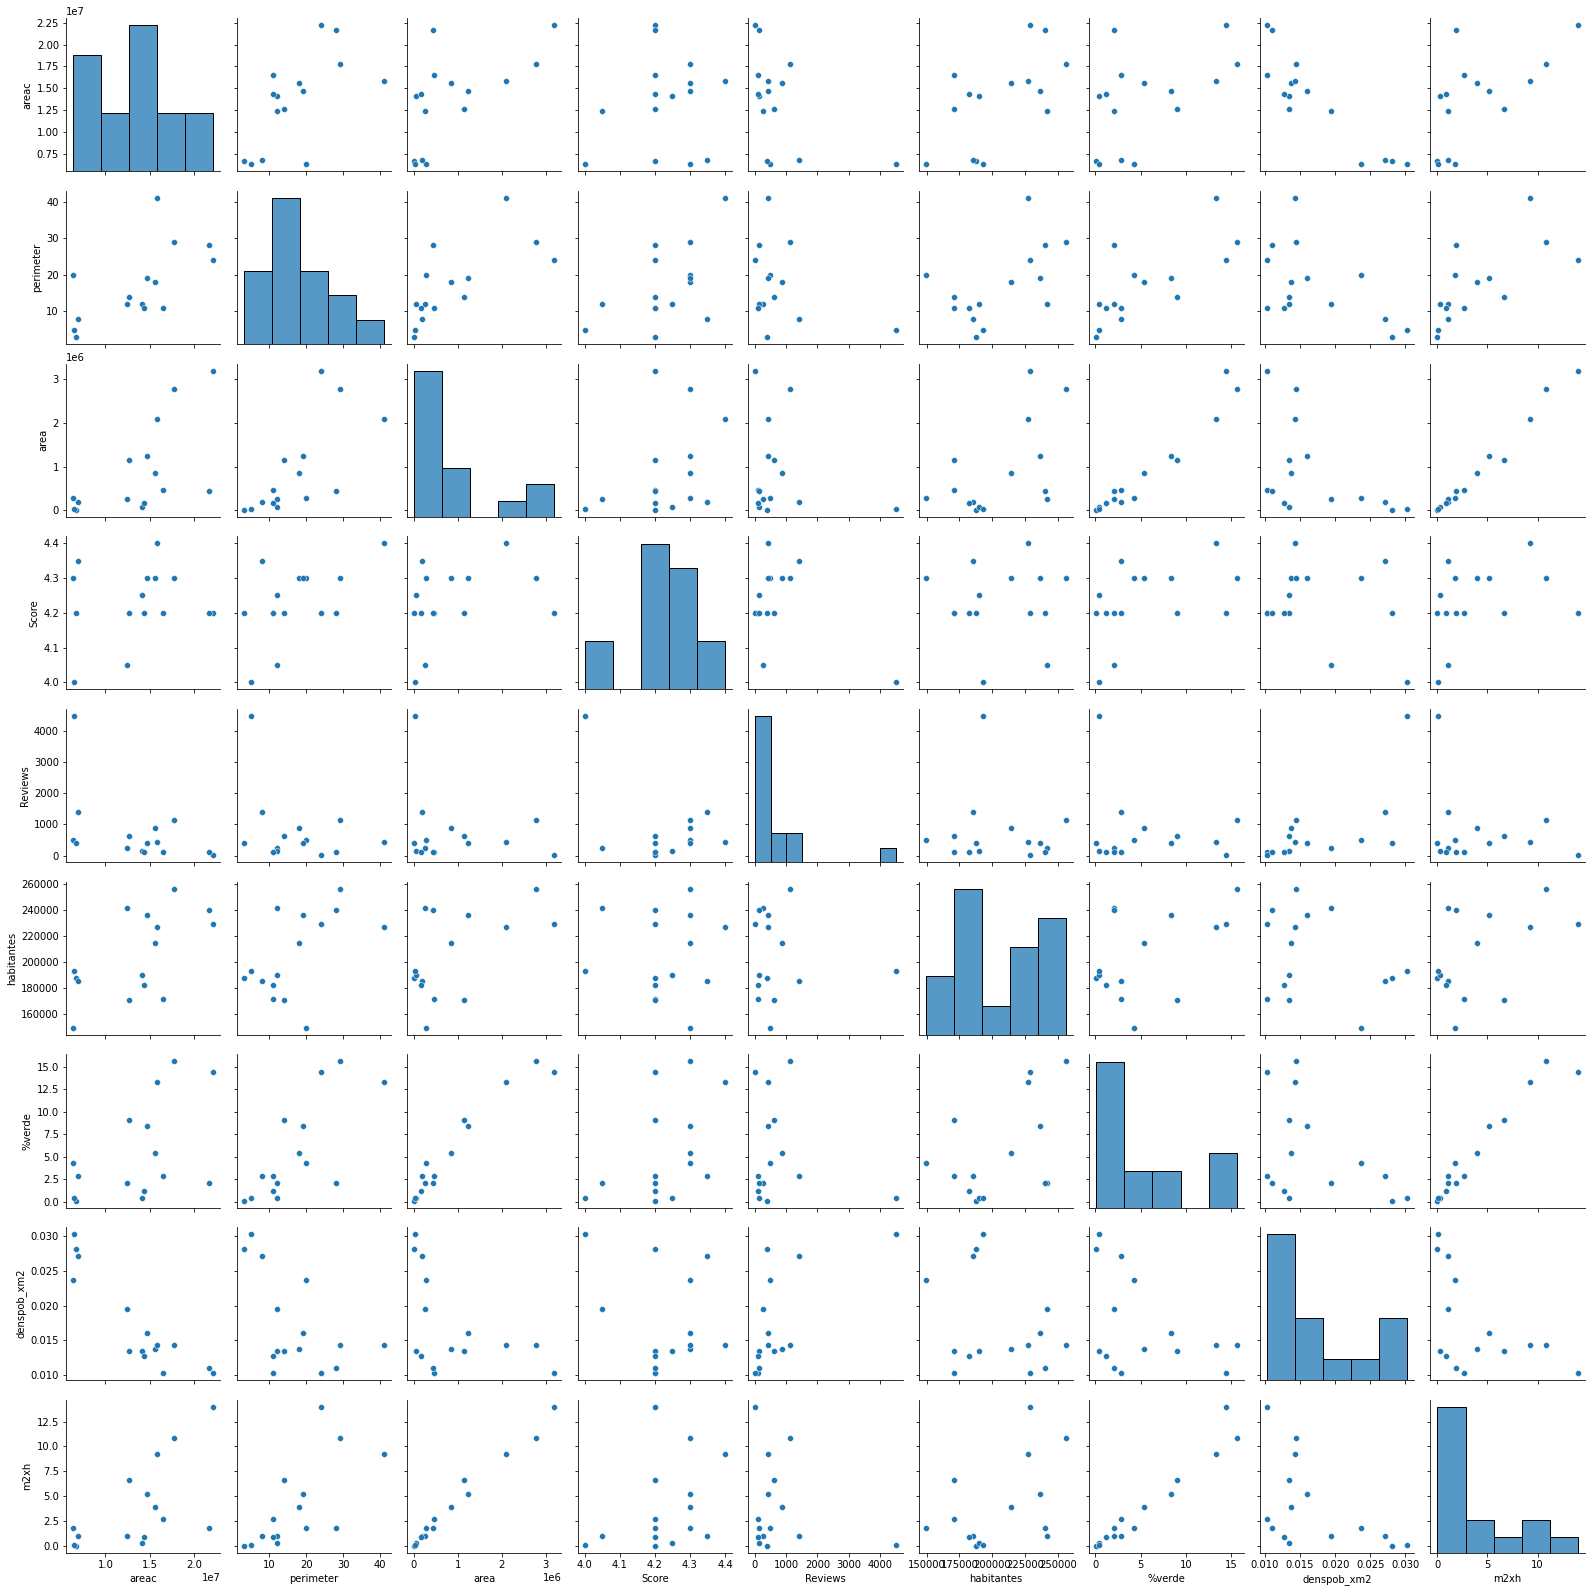

In [267]:
sns.pairplot(comunas)

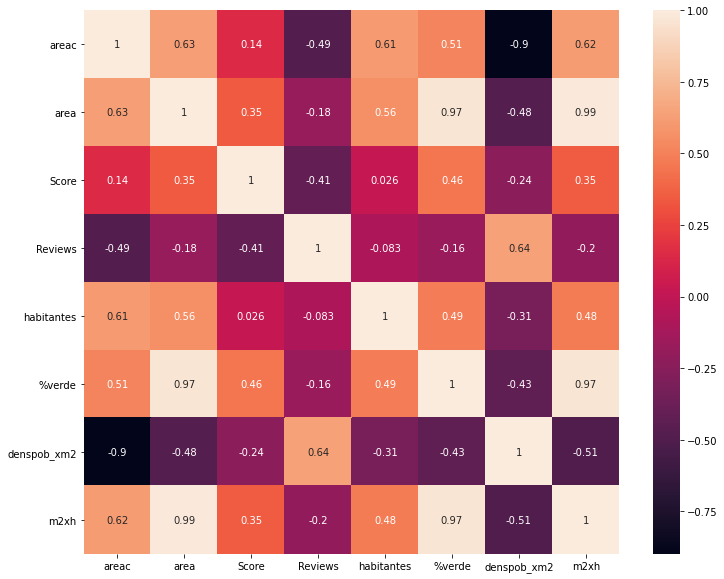

In [275]:
plt.figure(figsize=(12,10))
sns.heatmap(comunas.corr(), annot=True)
plt.show()

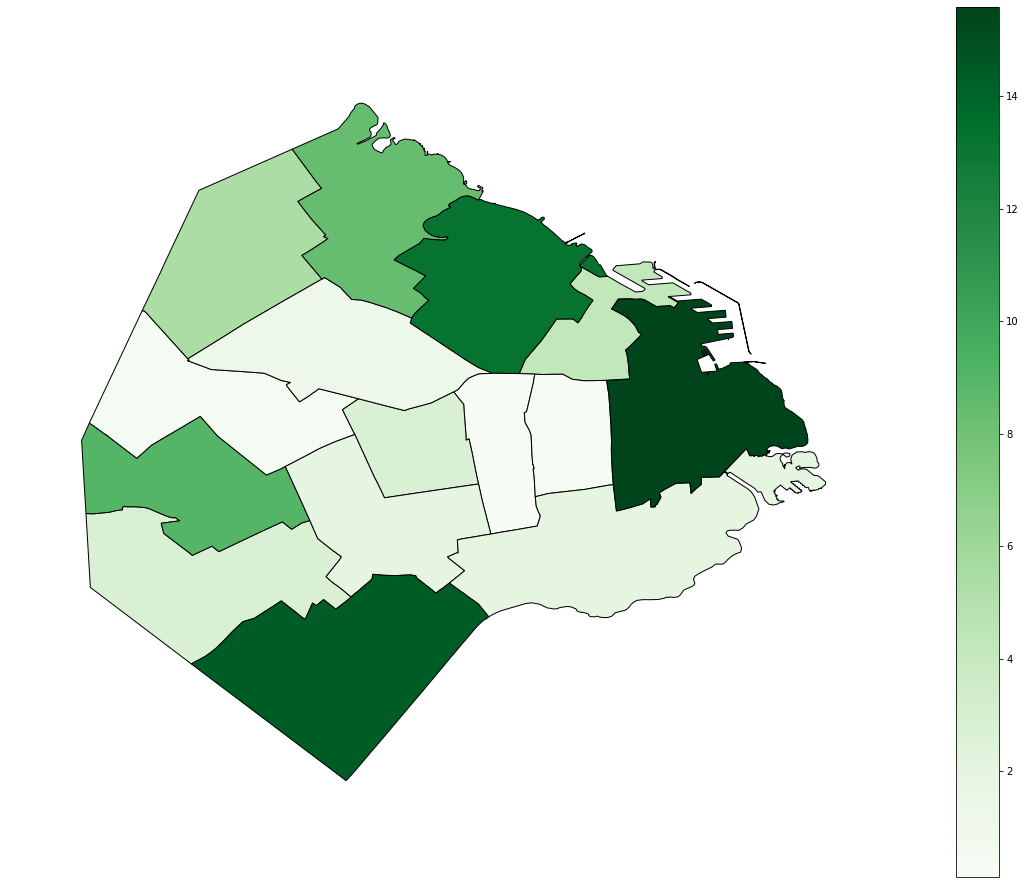

In [277]:
gplt.choropleth(comunas, hue = comunas['%verde'], cmap = 'Greens', figsize = (20,16), legend = True)

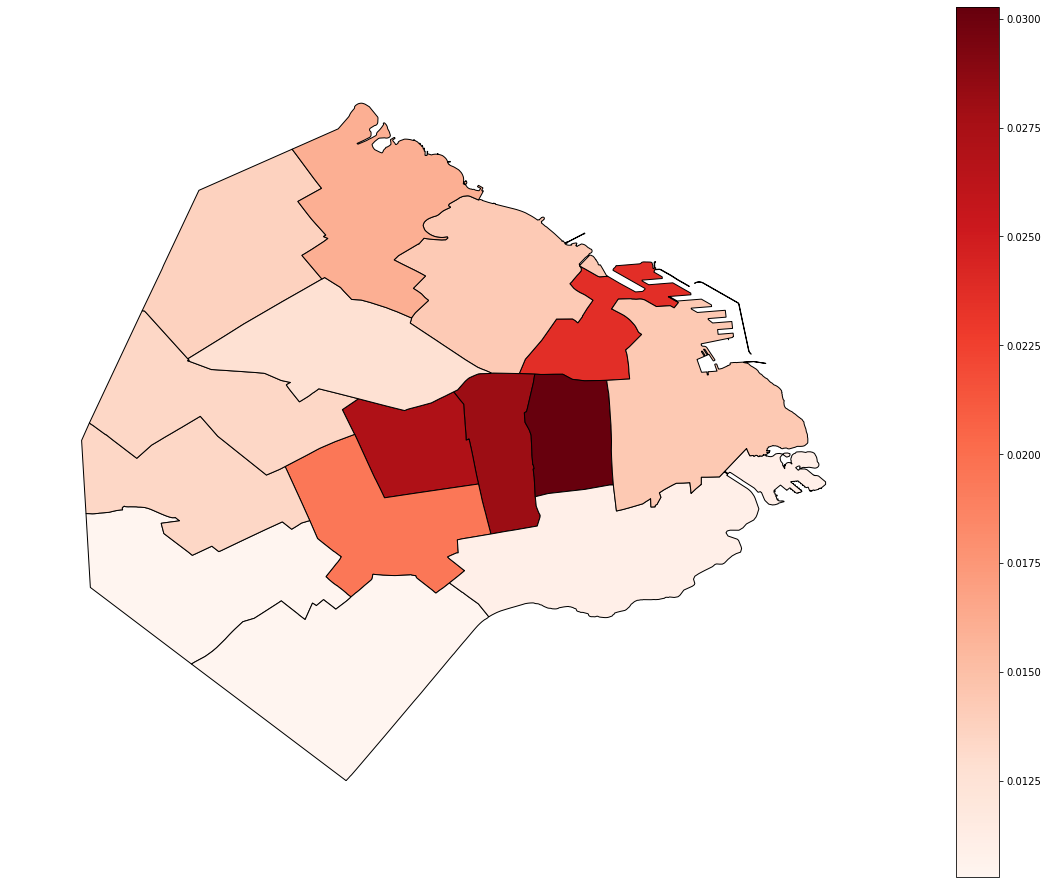

In [283]:
gplt.choropleth(comunas, hue = comunas['denspob_xm2'], cmap = 'Reds', figsize = (20,16), legend = True)

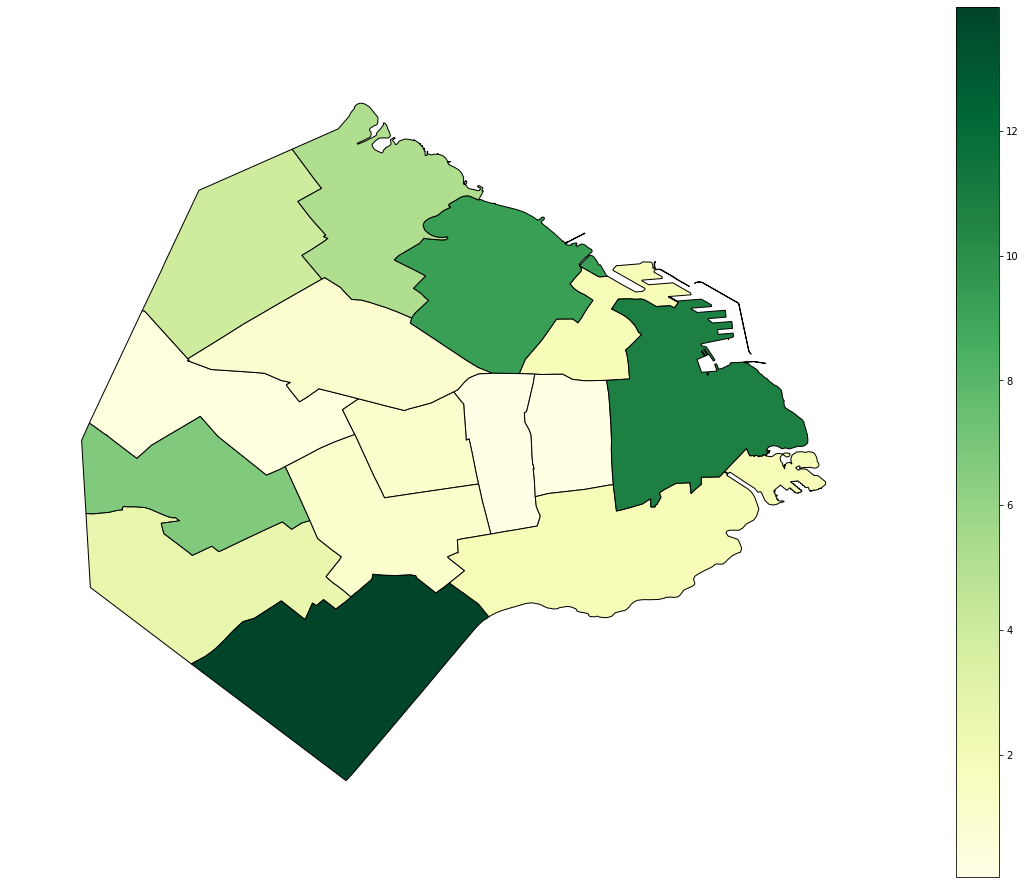

In [289]:
# recordar que la OMS reomineda mas de 9
gplt.choropleth(comunas, hue = comunas['m2xh'], cmap = 'YlGn', figsize = (20,16), legend = True)

In [ ]:
# densidad poblacional = habitantes/AREA COMUNA

# ESPACIOS VERDES/ESPACIOS TOTALES

# M2 DE ESPACIOS VERDES POR PERZONA EN CADA COMUNA

# Despues hacer un pairplot de todo eso y graficos del mapa de la ciudad por comuna sobre estos aspectos para entenderlo bien. y ves i hay alguna clasificacione o correlacion.

#

# Merge con presupuestos

# Bibliografía

Se utilizaron distintas paguinas para contender el manejo de datasets de caracter geografico, sumado a las librerias basicas



https://towardsdatascience.com/plotting-geographical-data-with-geopandas-338cc7e17e4e

https://geopandas.org/aggregation_with_dissolve.html

https://geopandas.org/aggregation_with_dissolve.html
https://www.datacamp.com/community/tutorials/geospatial-data-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=Cj0KCQjwt4X8BRCPARIsABmcnOrWMSIaHzSoPH6EUAqAK2TPpsrLjKSR6wy41-uzoi5kBgnQXT49jBgaAuOgEALw_wcB

